In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

# Case Study of Paul Coveney's Office

In [6]:
file = "data/combined_milas_hall/Flo2.3-A2-28.csv"
df = pd.read_csv(file)
df.head()

timestamp     DprPos  FlSpt  HwVlvPos      RmTmp  RmTmpCspt  \
0  2020-10-09 09:45:00  33.789062  100.0     37.50  69.632812  72.429688   
1  2020-10-09 10:00:00  33.789062  100.0      0.00  70.562500  72.429688   
2  2020-10-09 10:15:00  33.789062  100.0     37.50  69.734375  72.429688   
3  2020-10-09 10:30:00  33.789062  100.0      0.00  70.390625  72.429688   
4  2020-10-09 10:45:00  33.789062  100.0     18.75  70.117188  72.429688   

   RmTmpHpst  SaFl  
0  70.429688  97.0  
1  70.429688  97.0  
2  70.429688  96.0  
3  70.429688  97.0  
4  70.429688  96.0

In [7]:
filtered_df = df[100000:300000]
filtered_df = filtered_df.copy()  # Avoid "Setting with a copy" warning
filtered_df['timestamp'] = pd.to_datetime(filtered_df['timestamp'])
filtered_df['date'] = filtered_df['timestamp'].dt.date

In [8]:
start_date = pd.to_datetime("2023-11-01").date()
end_date = pd.to_datetime("2024-03-30").date()
start_time = "00:00:00"
end_time = "17:00:00"
df_filtered_by_date = filtered_df[
    (filtered_df['date'] >= start_date) & (filtered_df['date'] <= end_date)
]

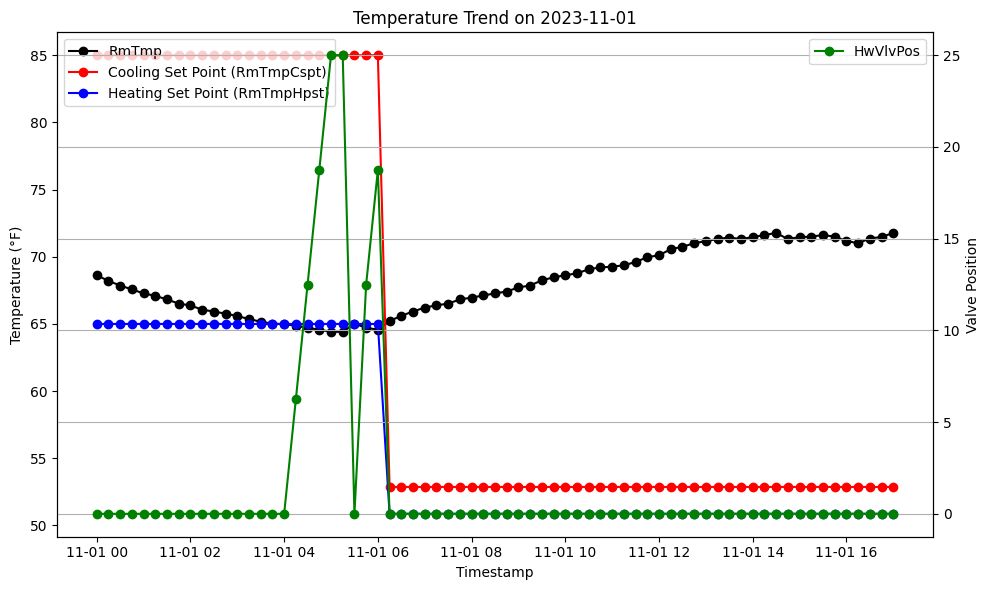

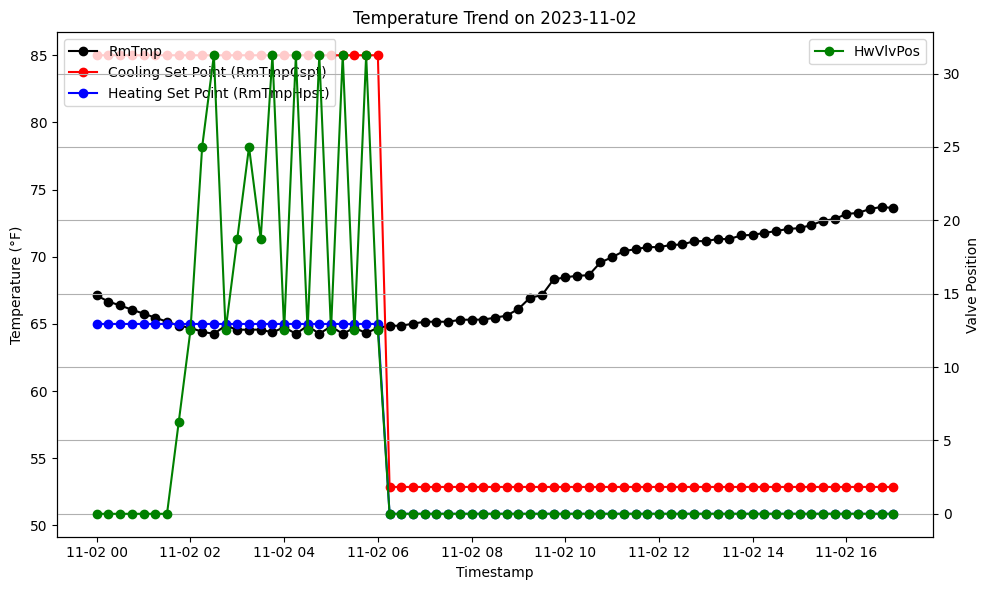

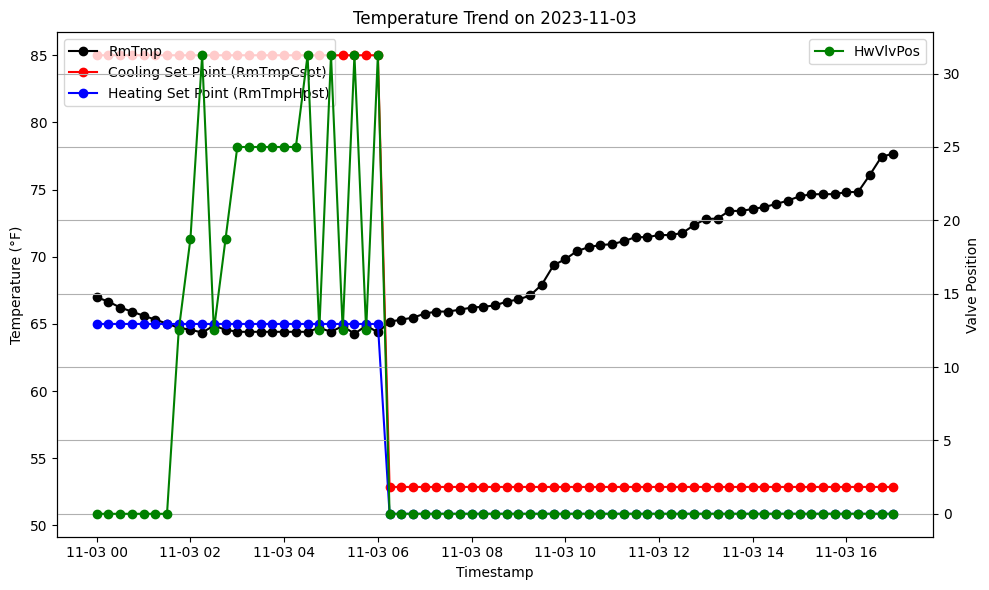

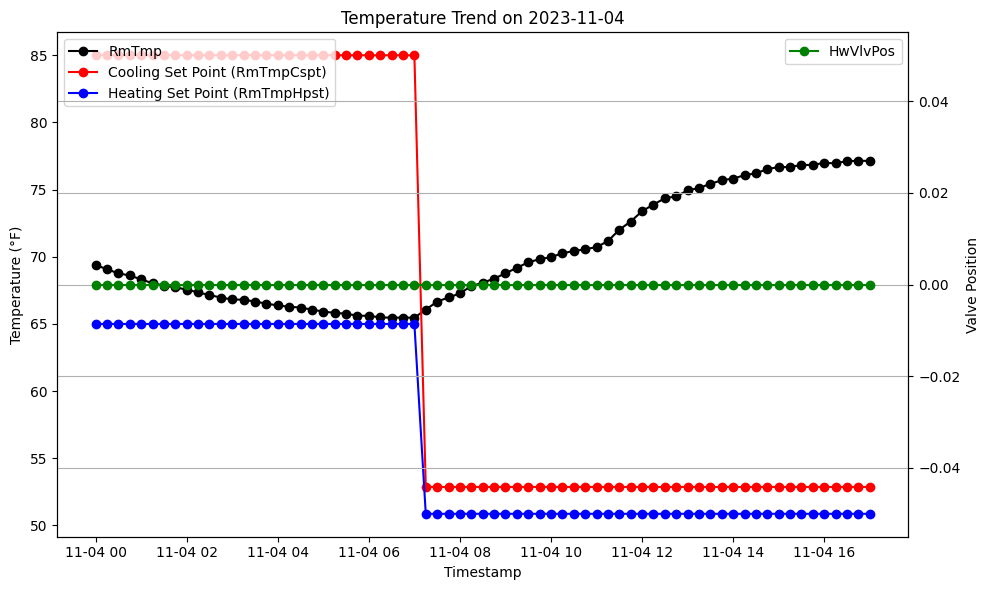

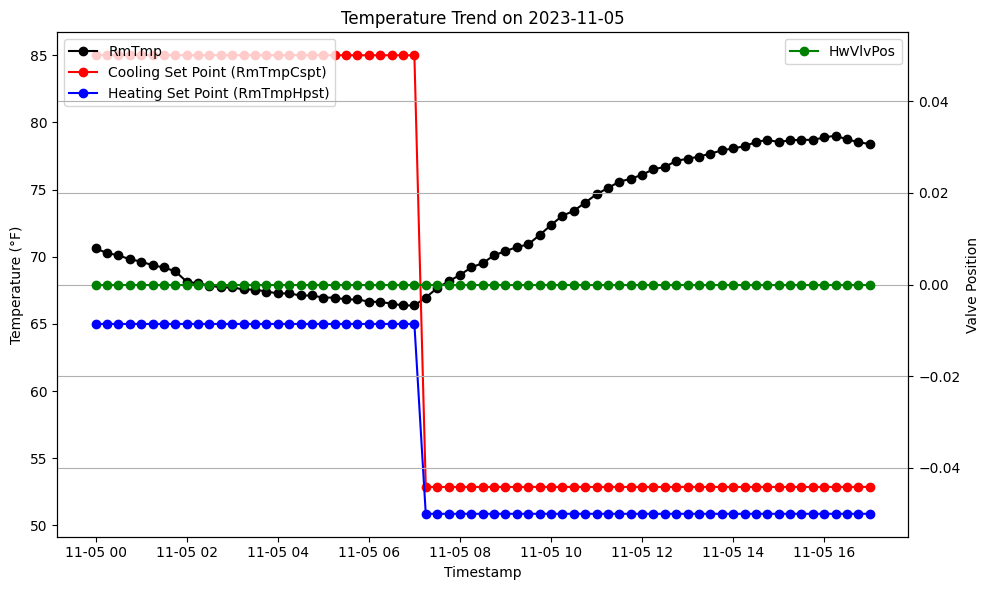

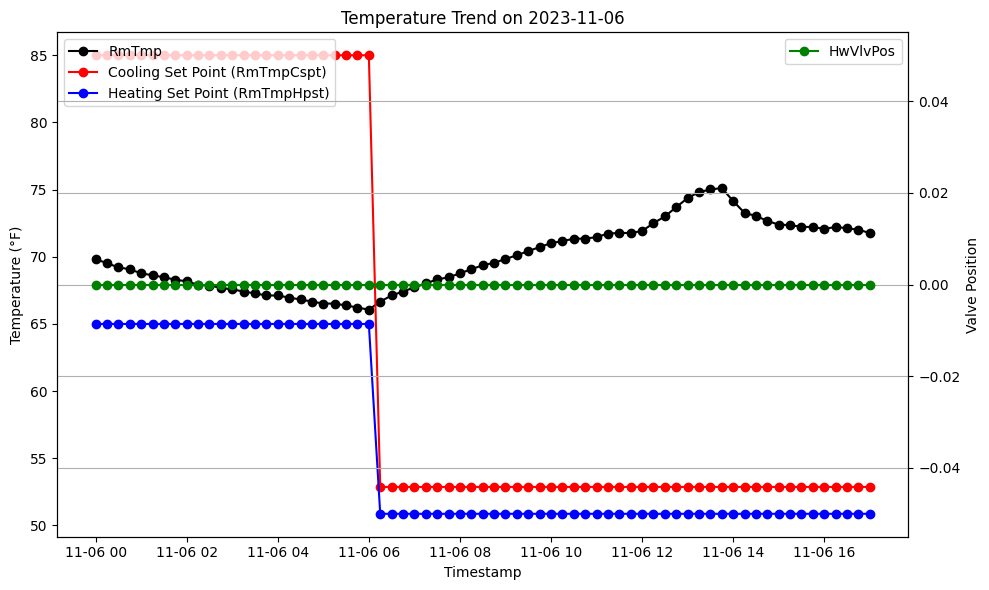

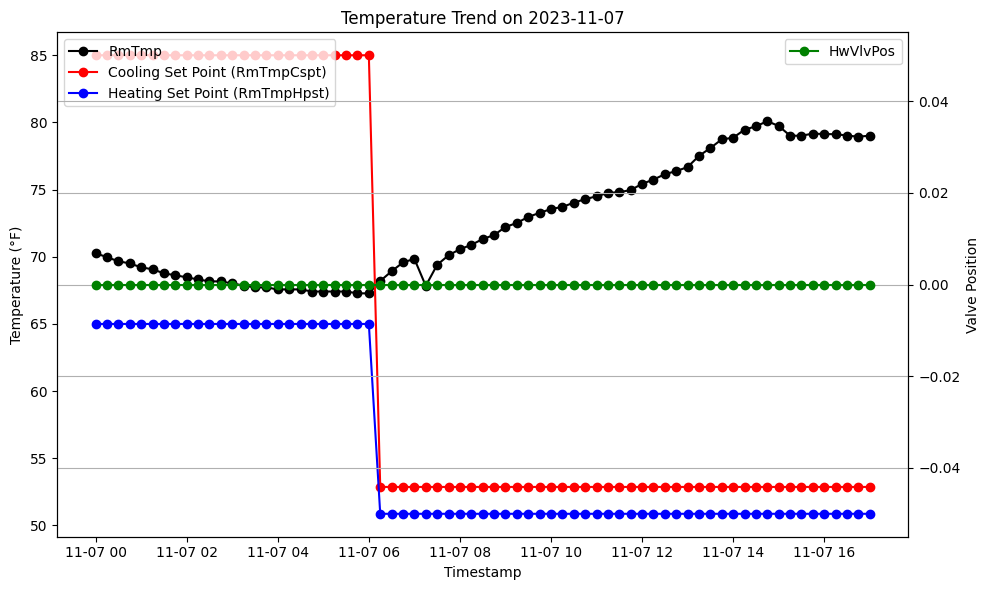

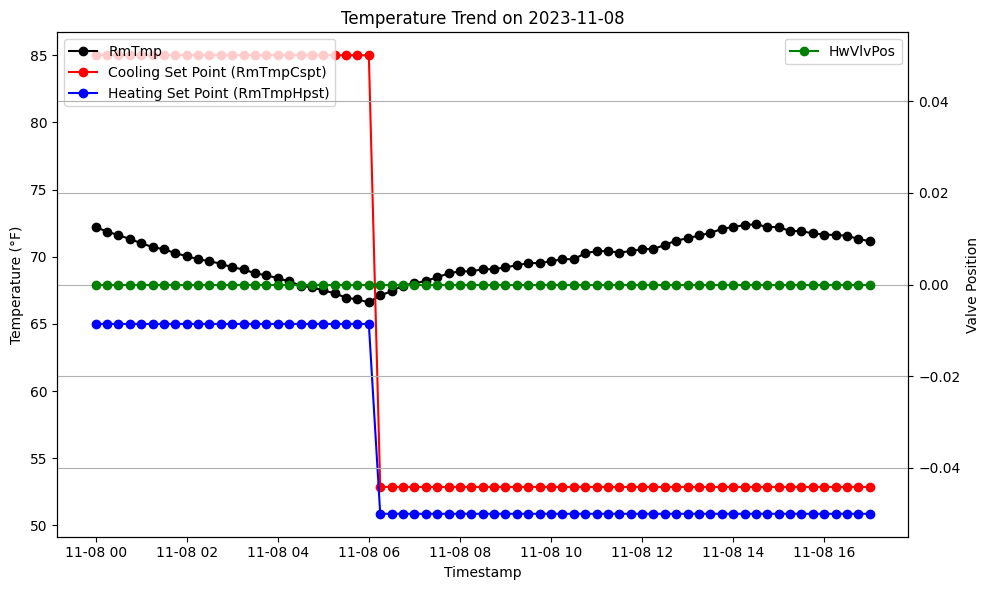

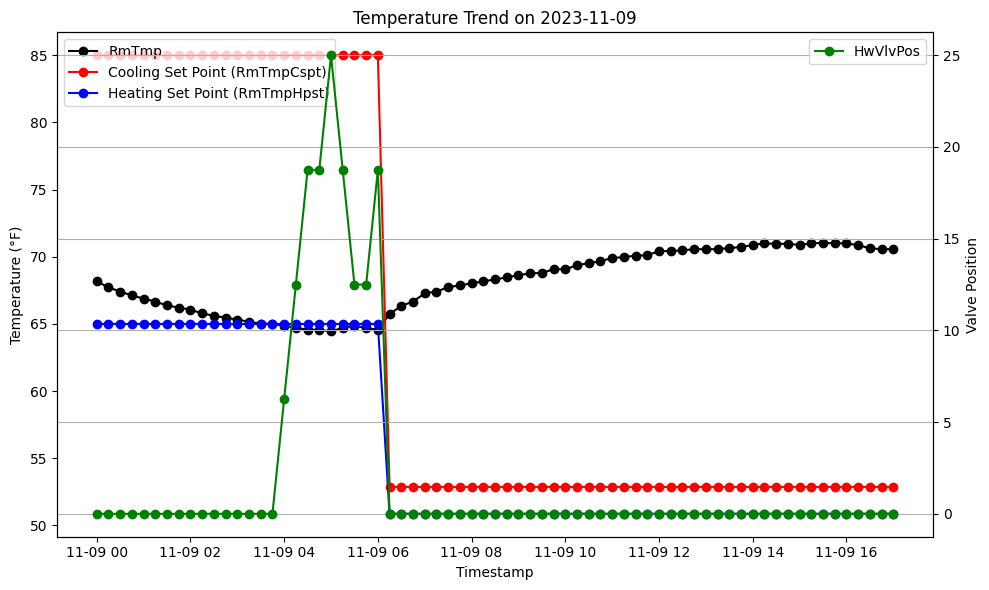

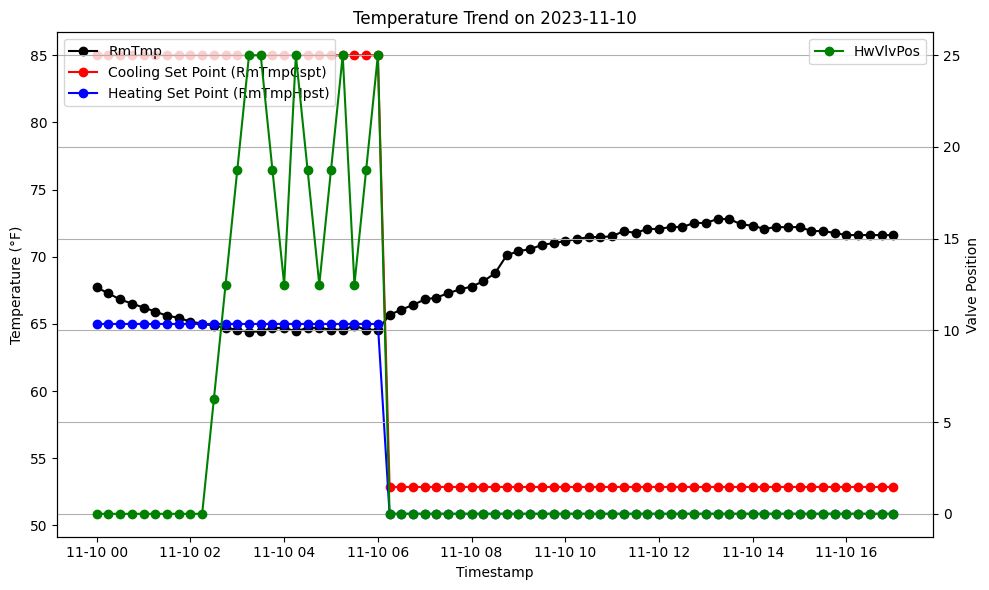

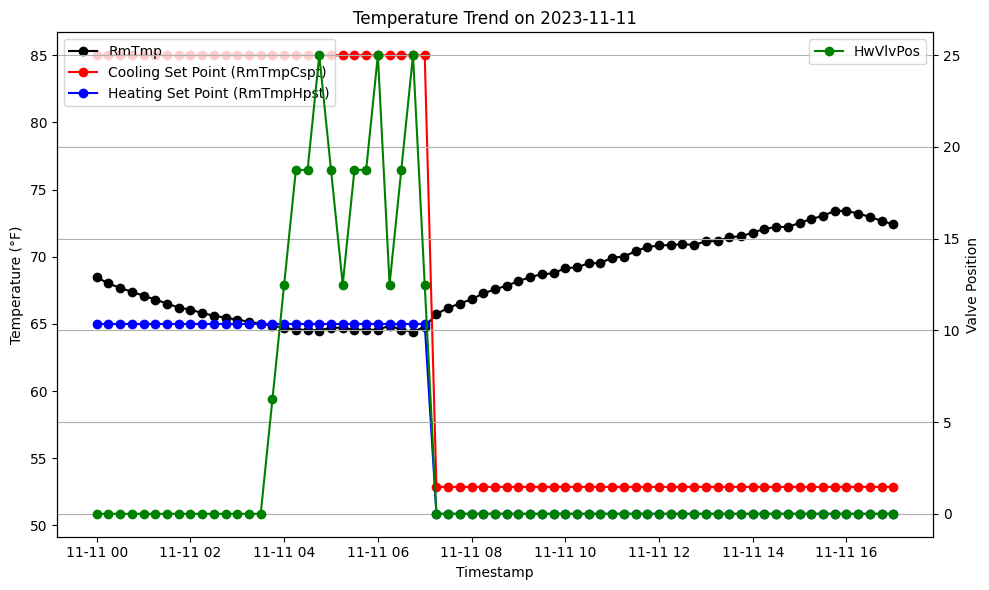

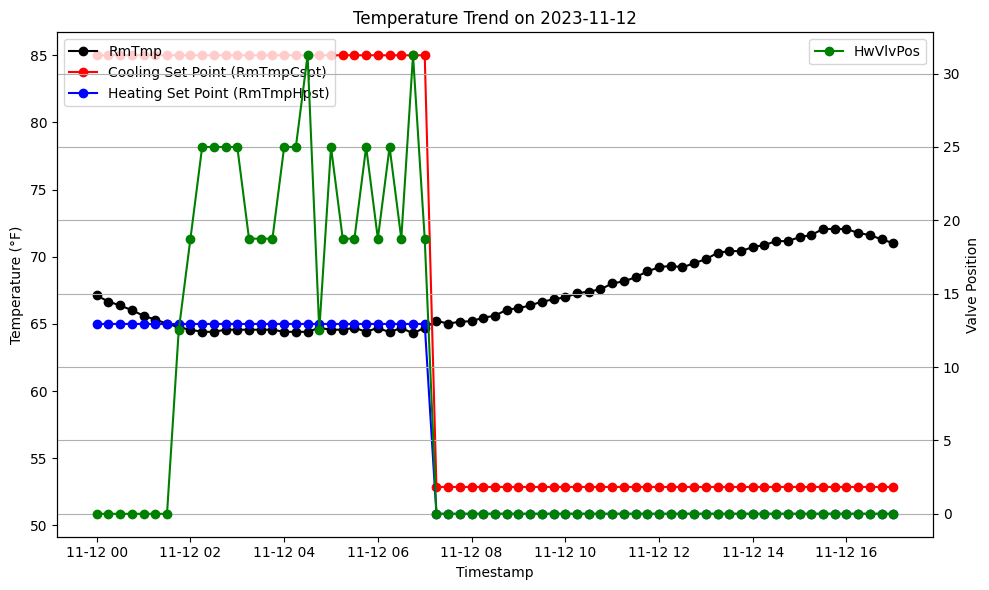

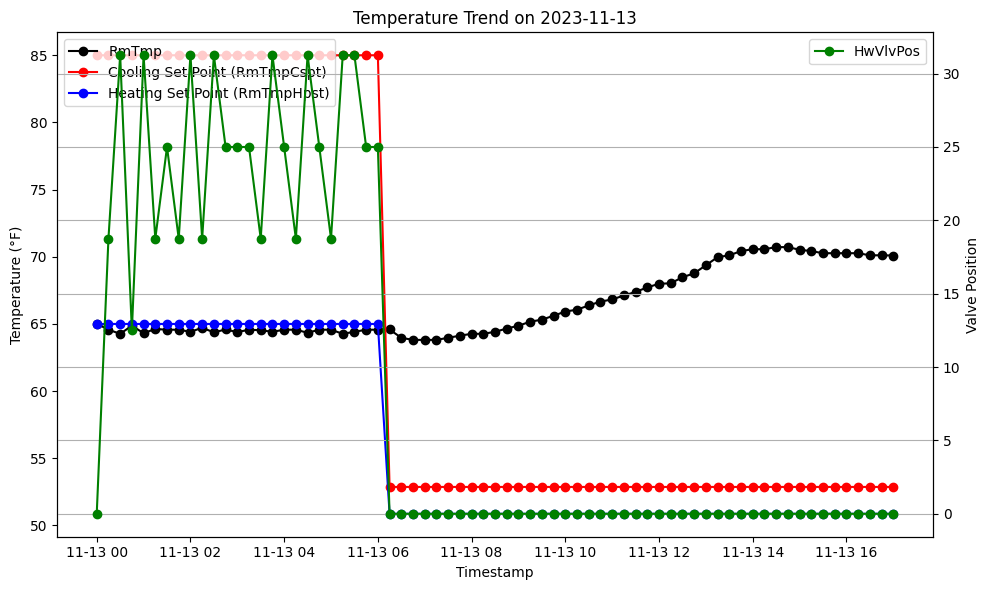

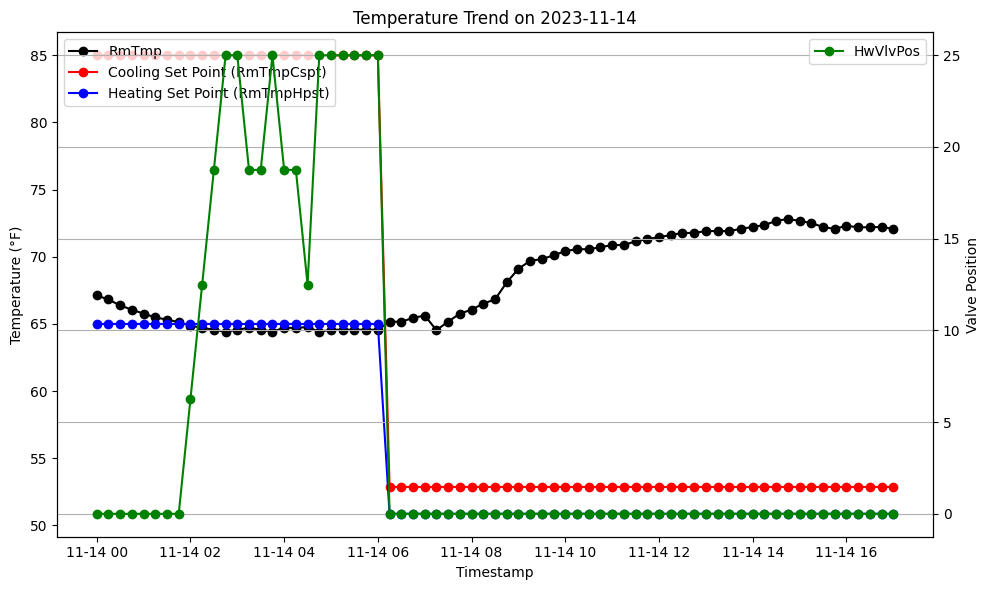

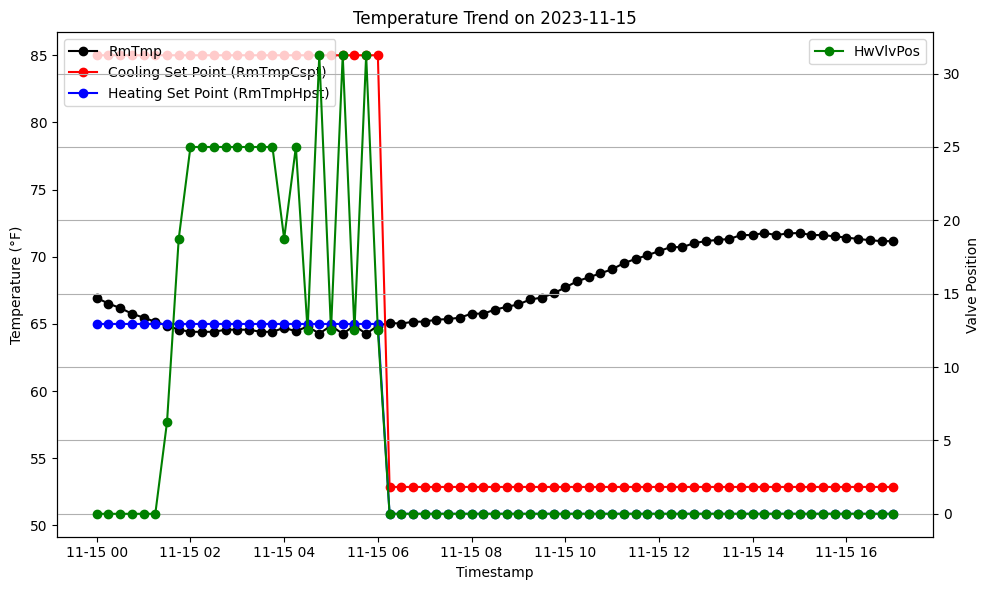

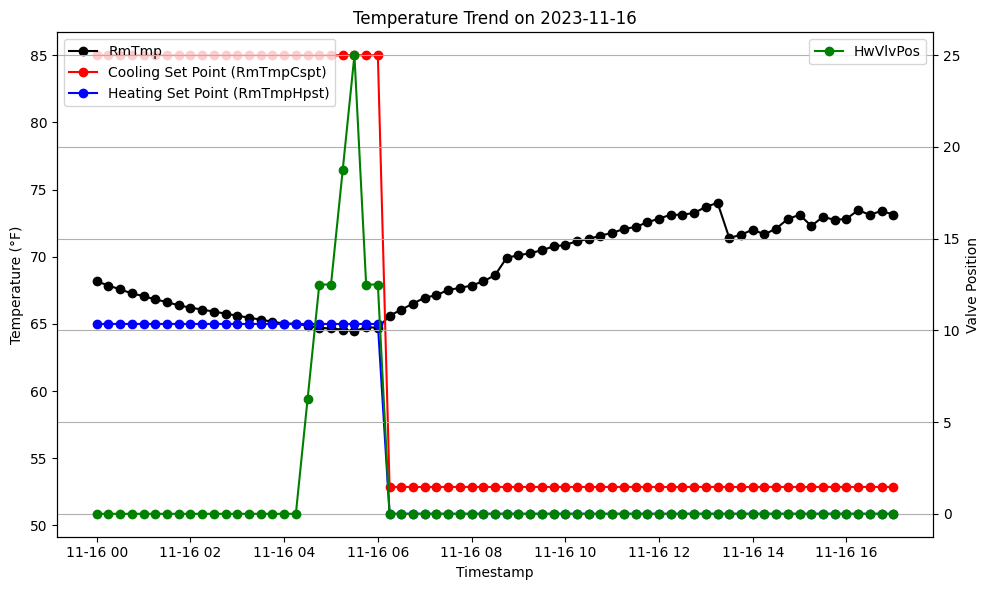

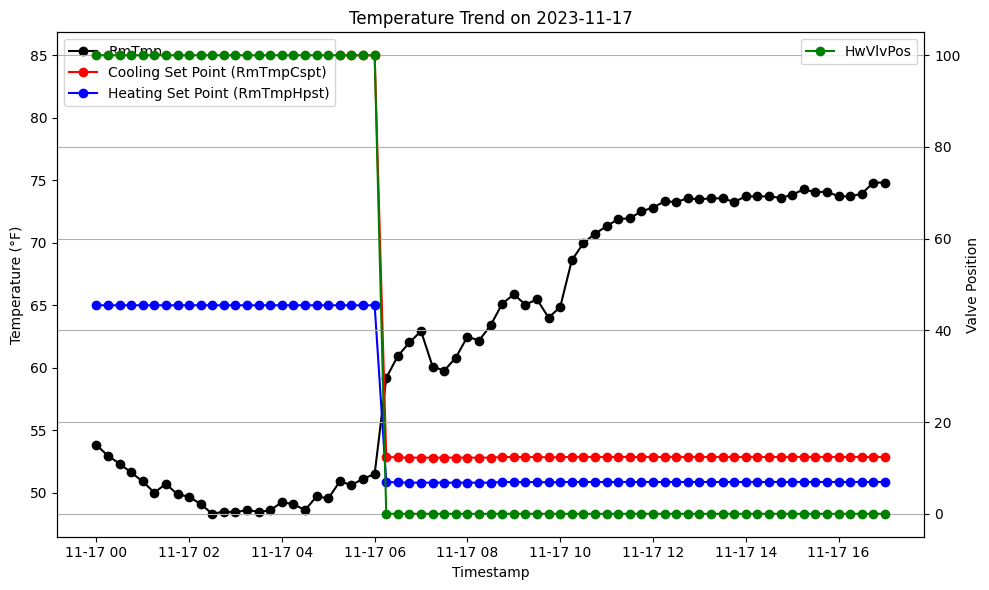

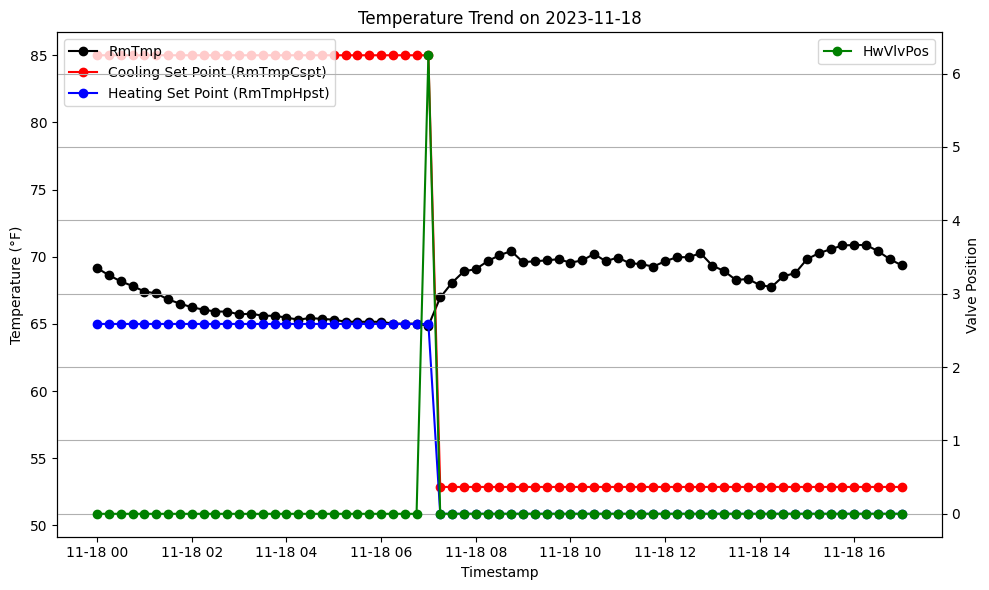

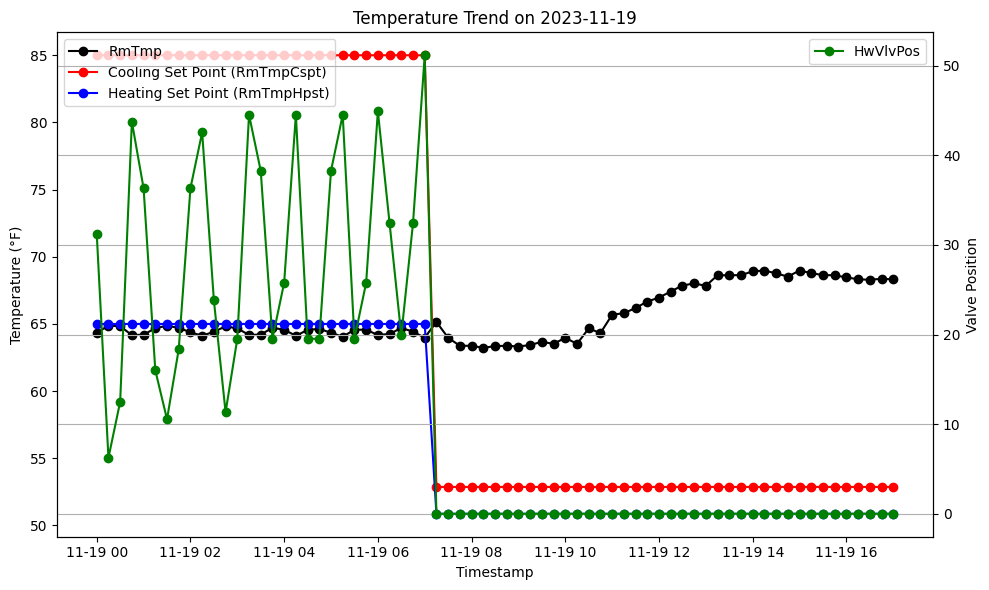

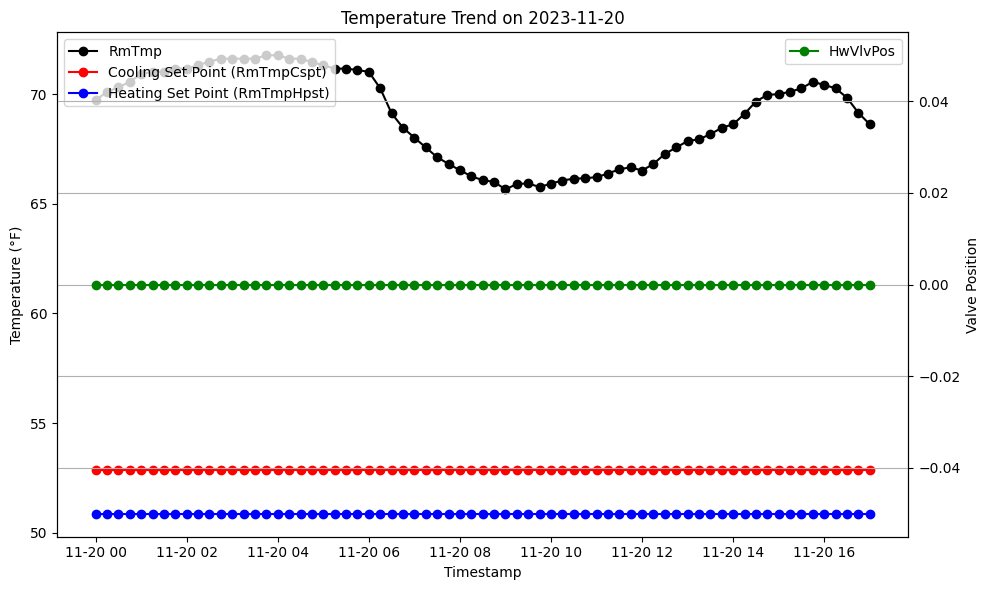

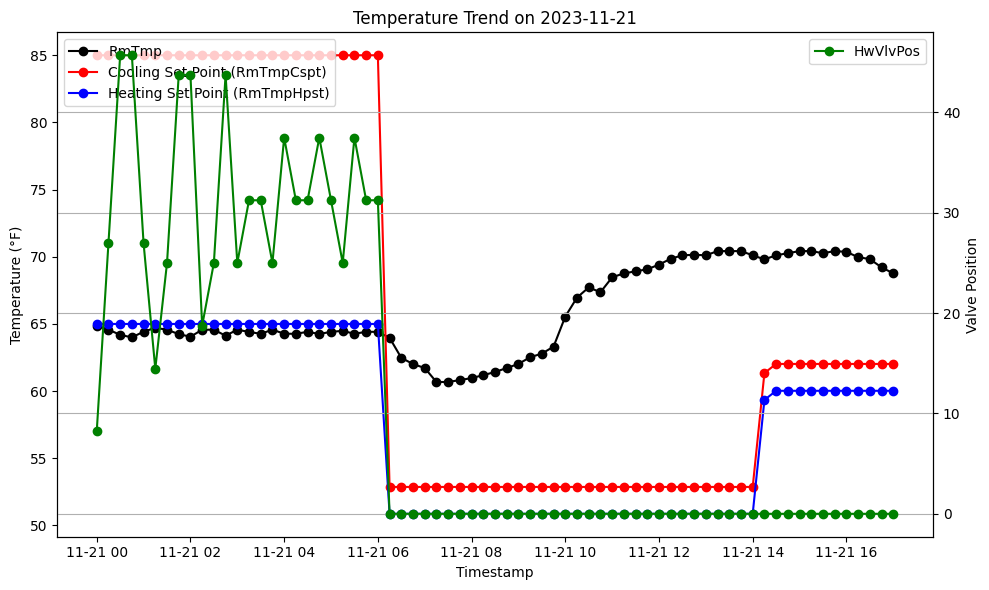

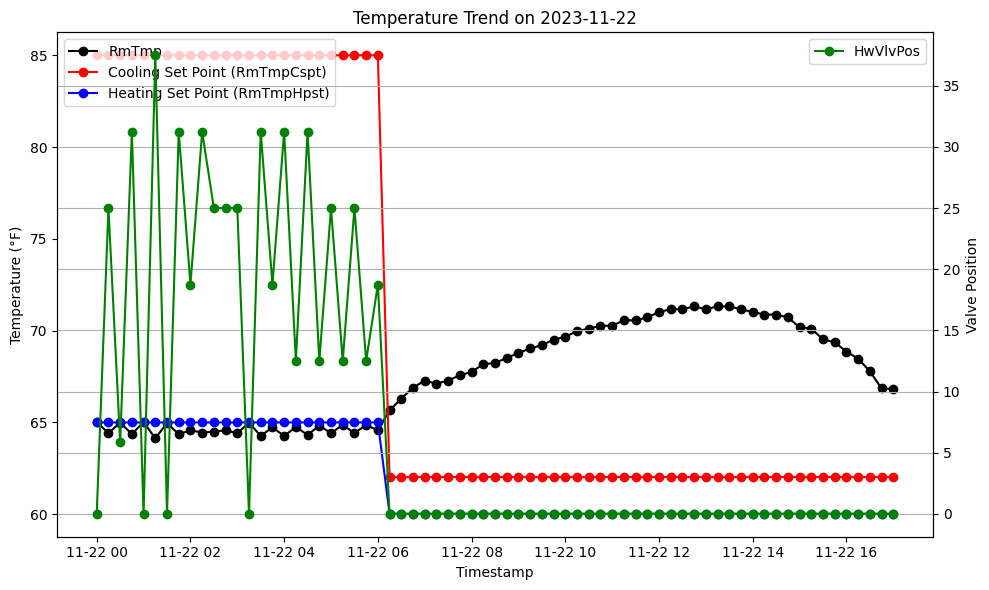

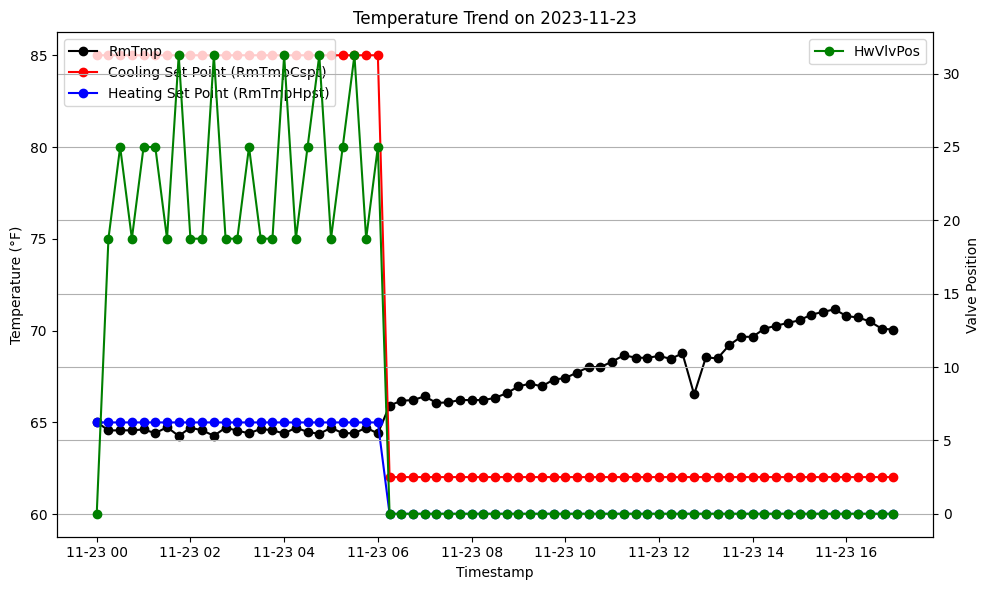

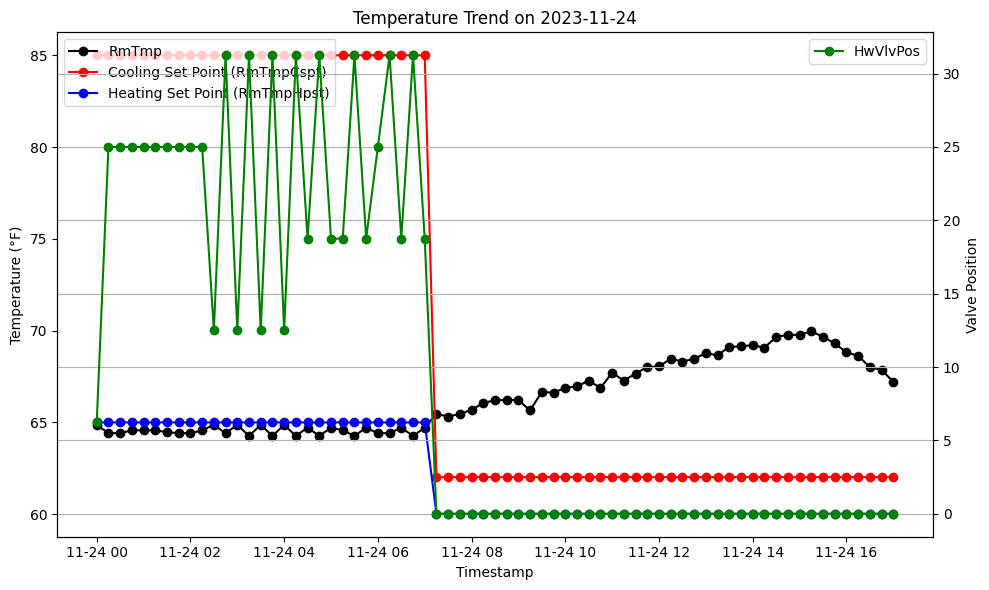

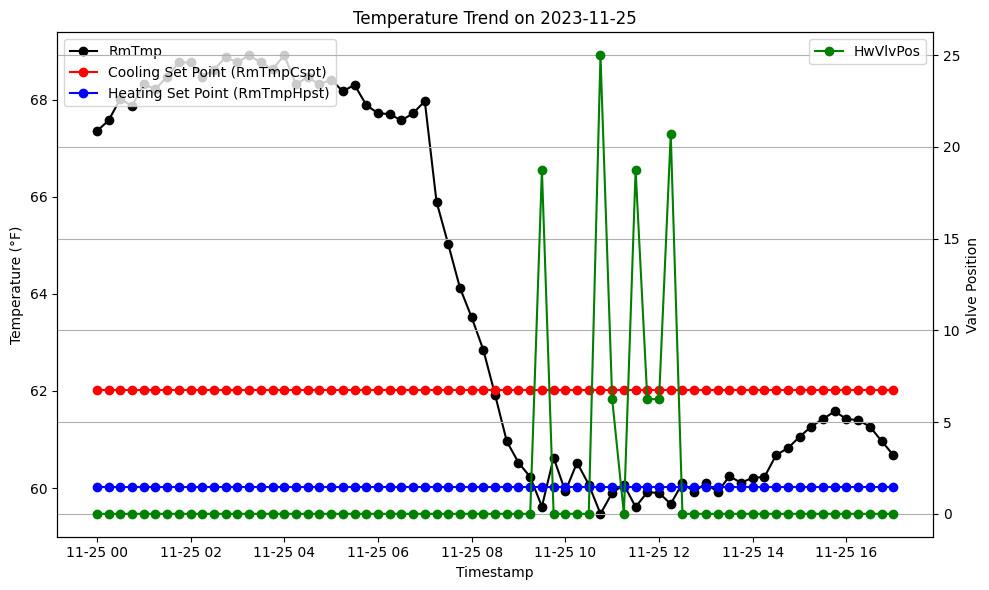

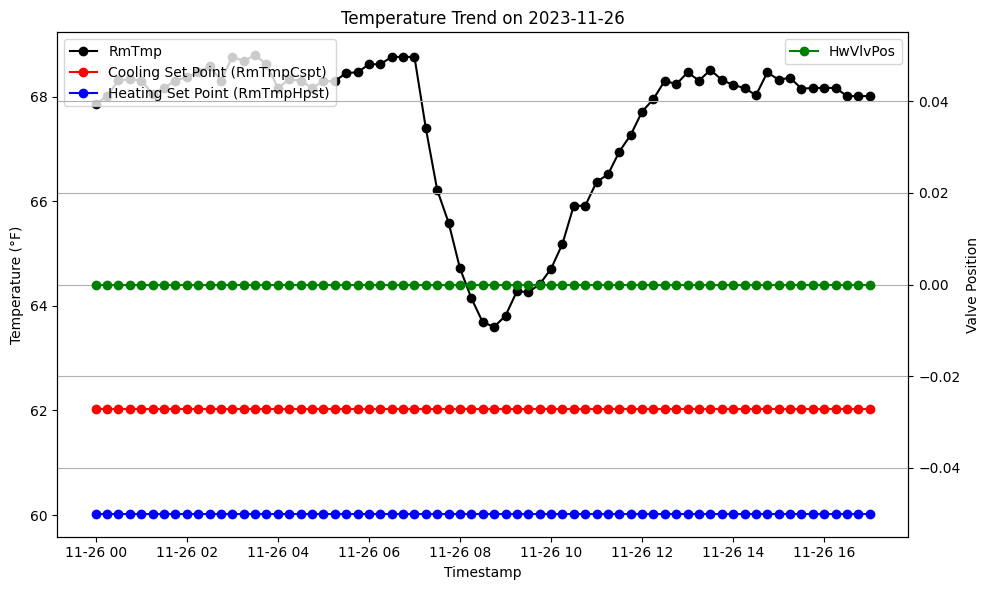

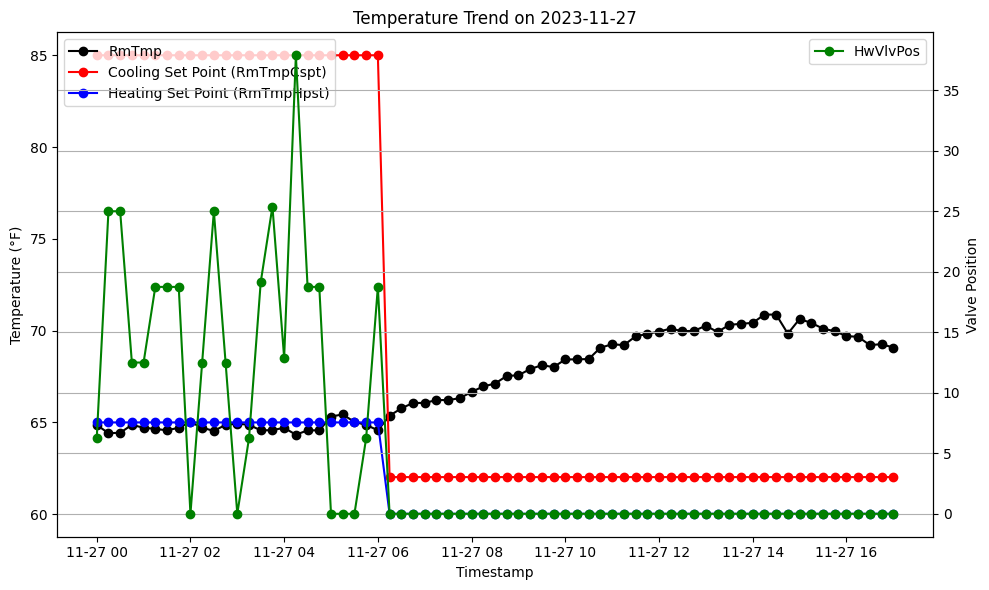

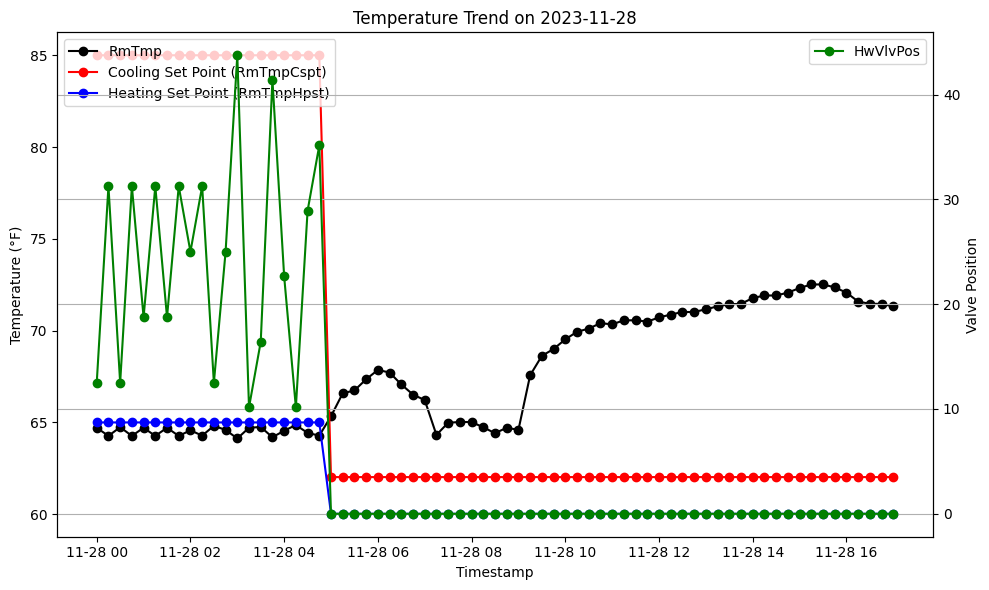

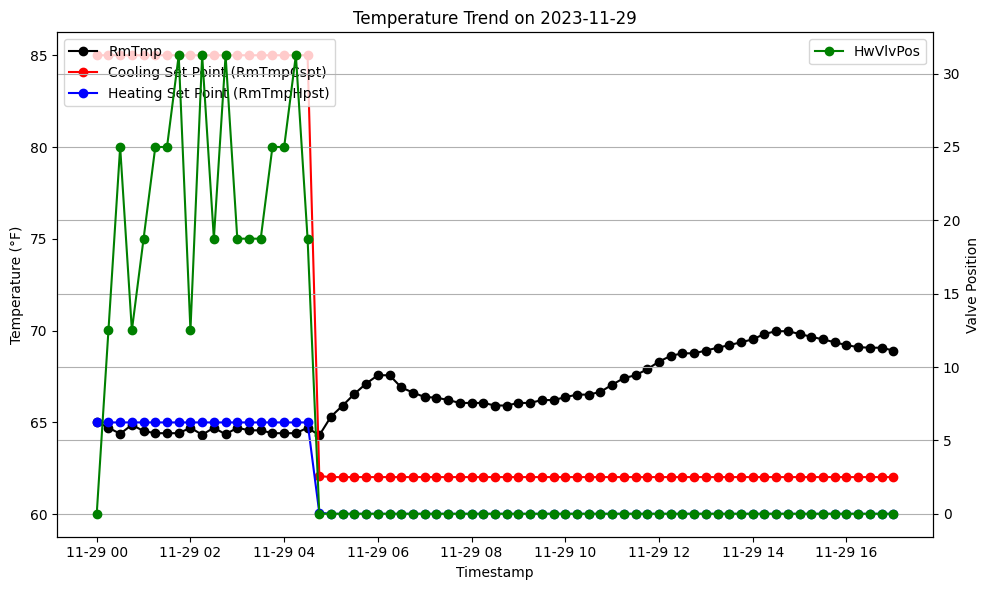

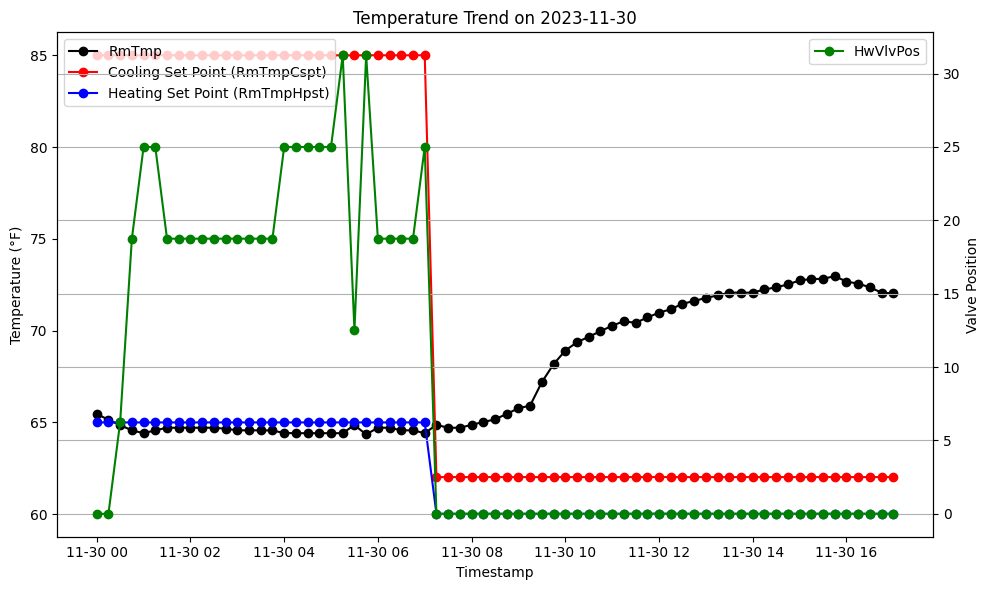

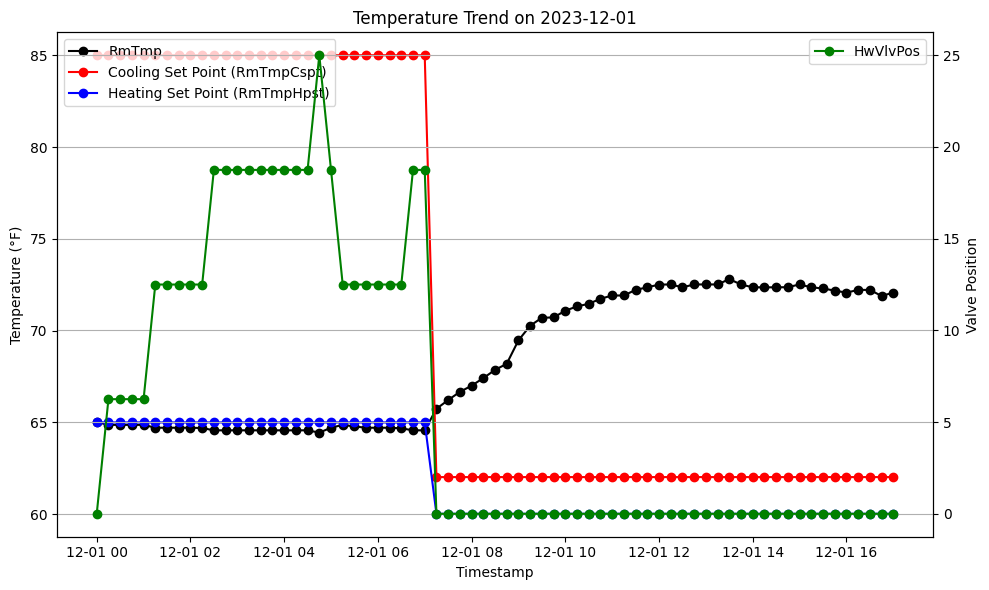

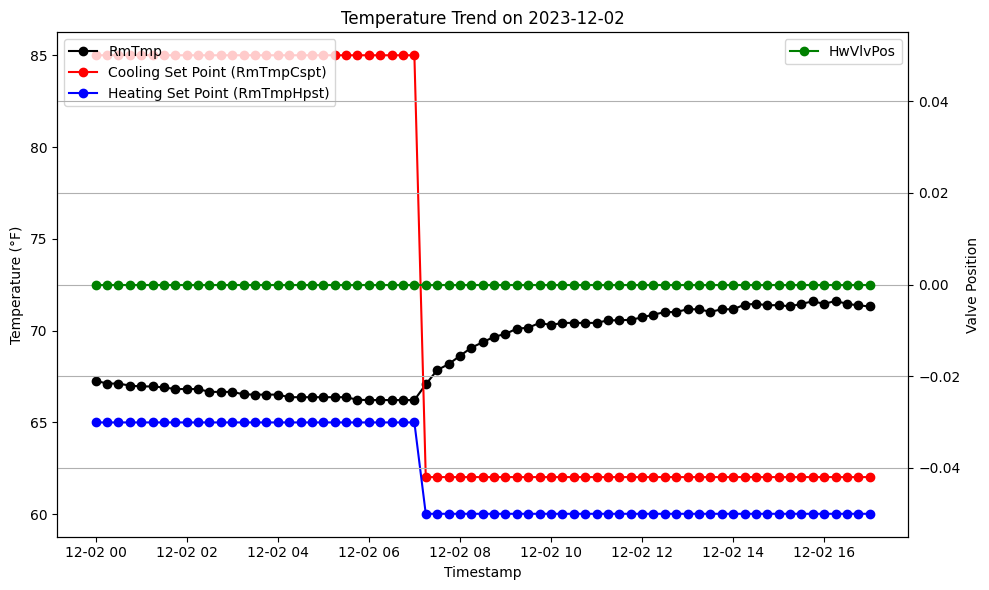

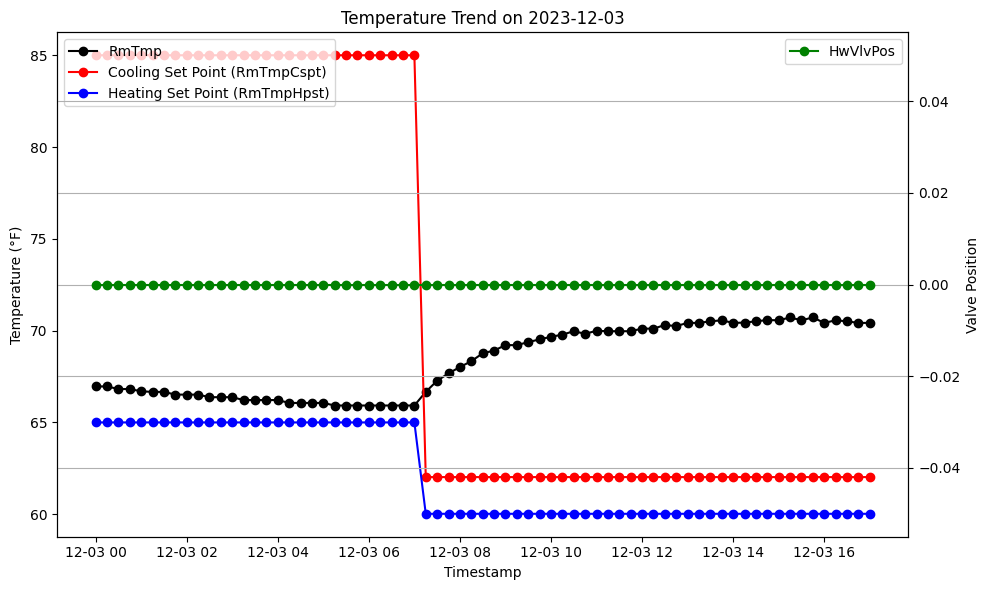

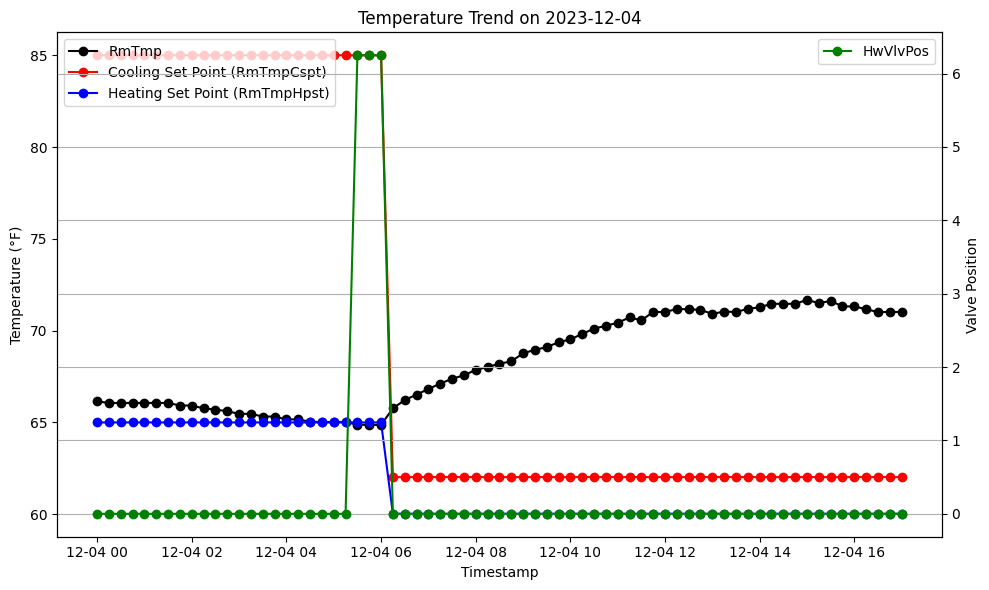

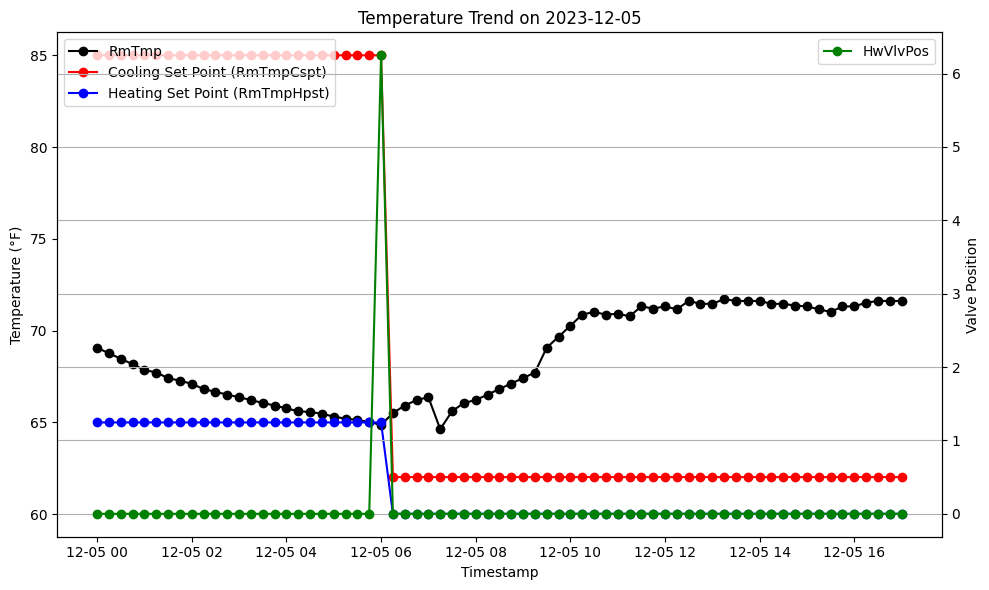

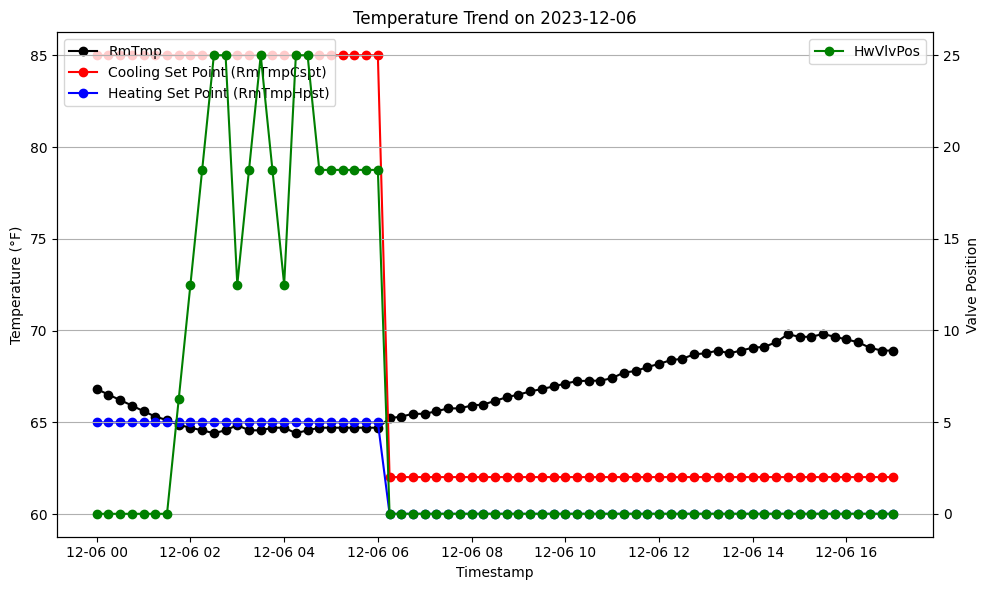

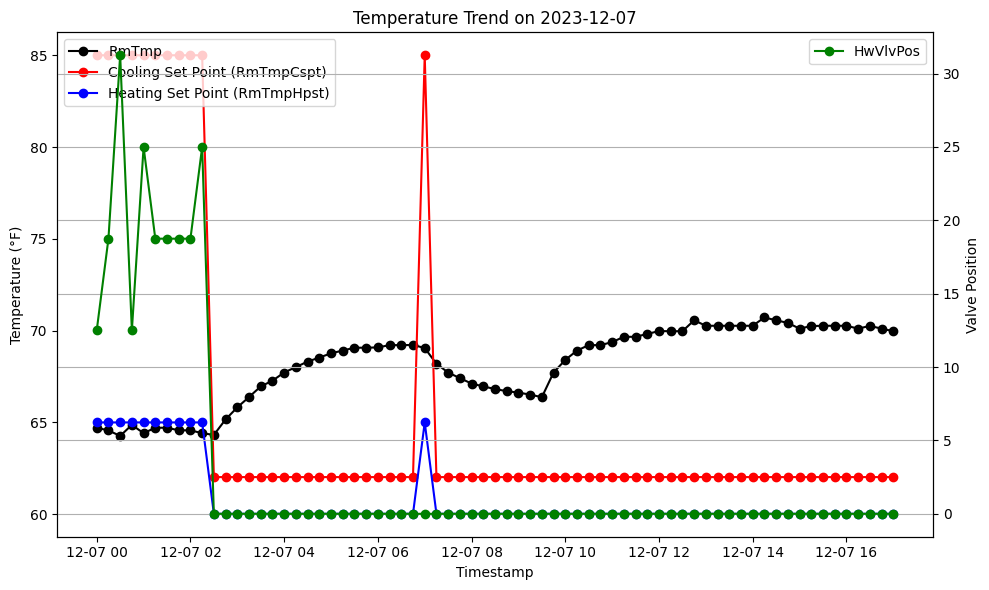

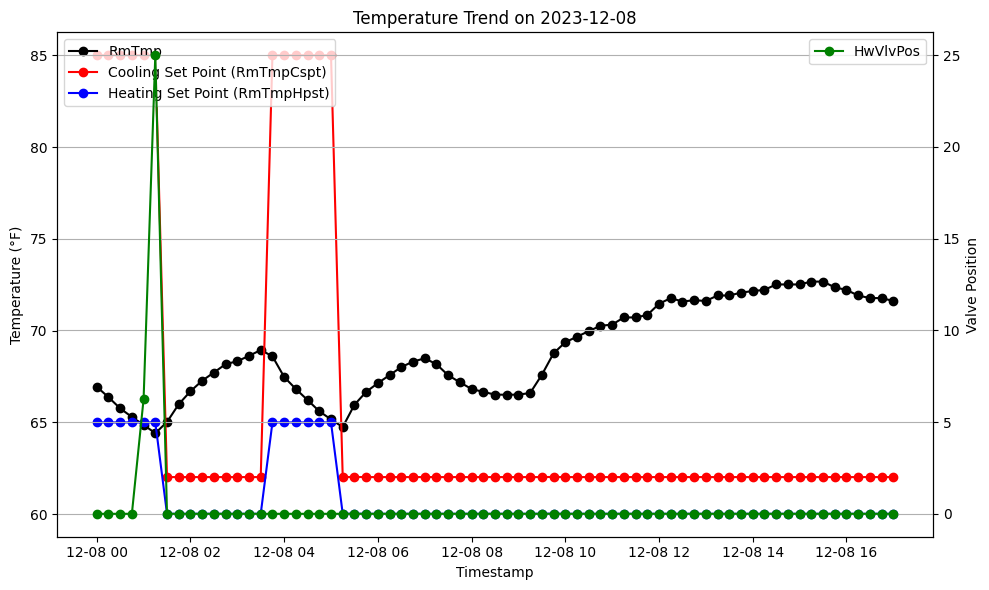

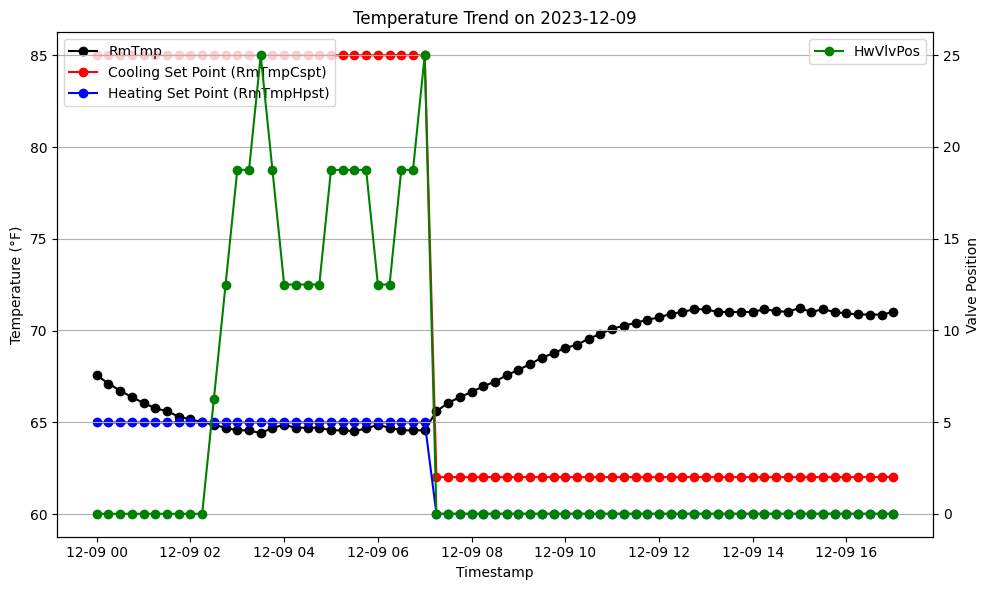

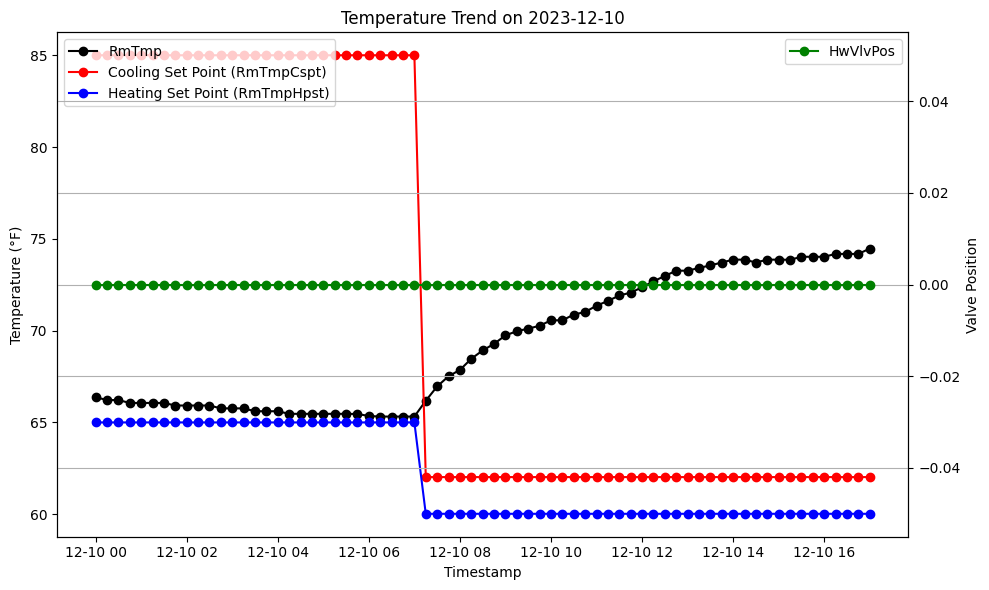

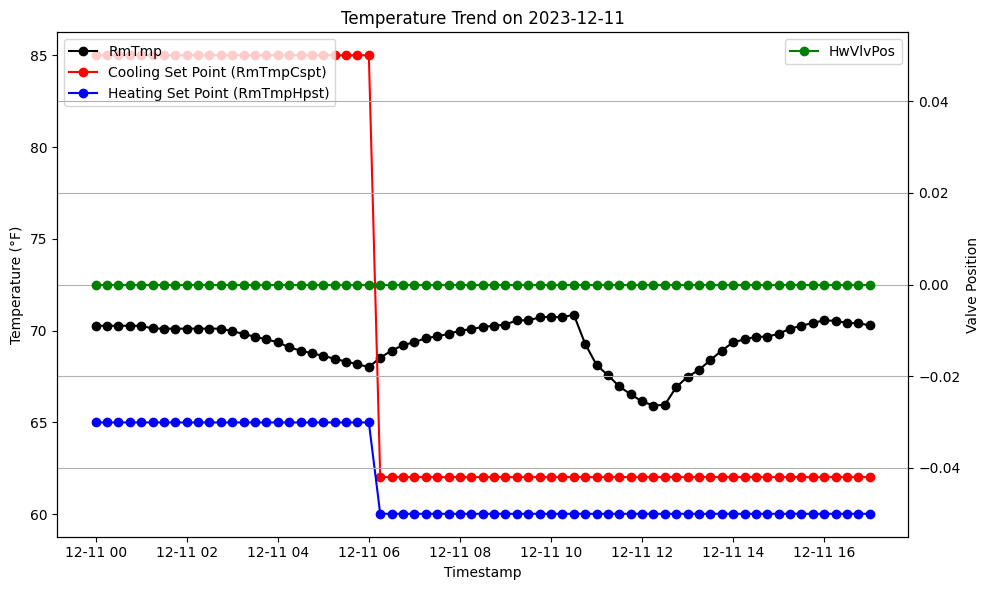

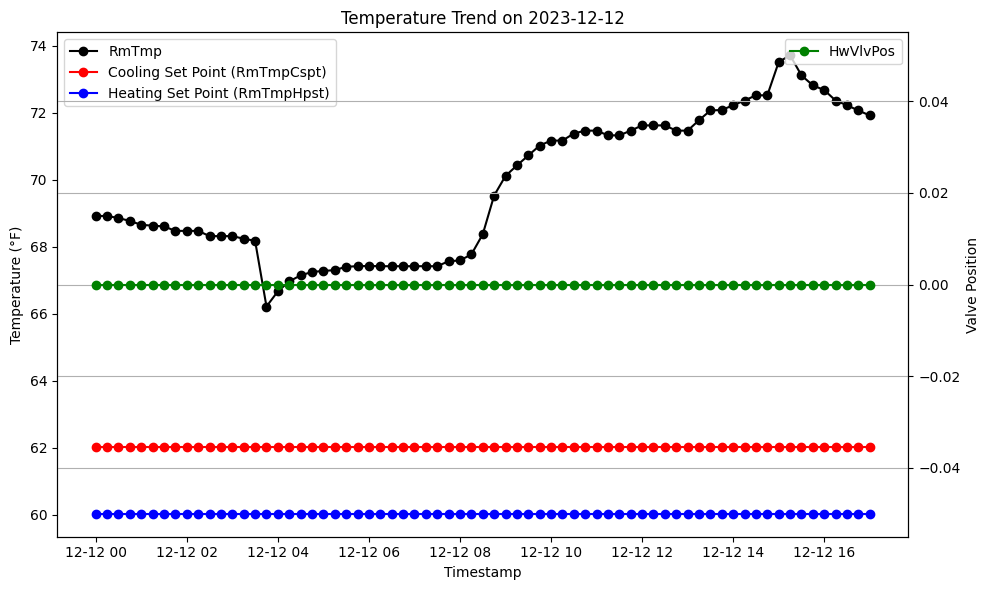

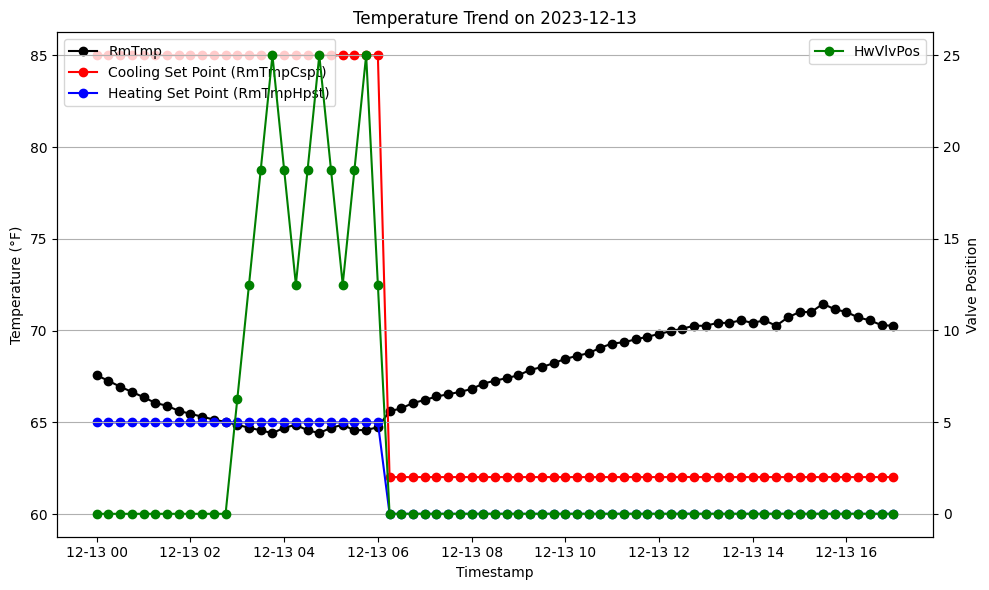

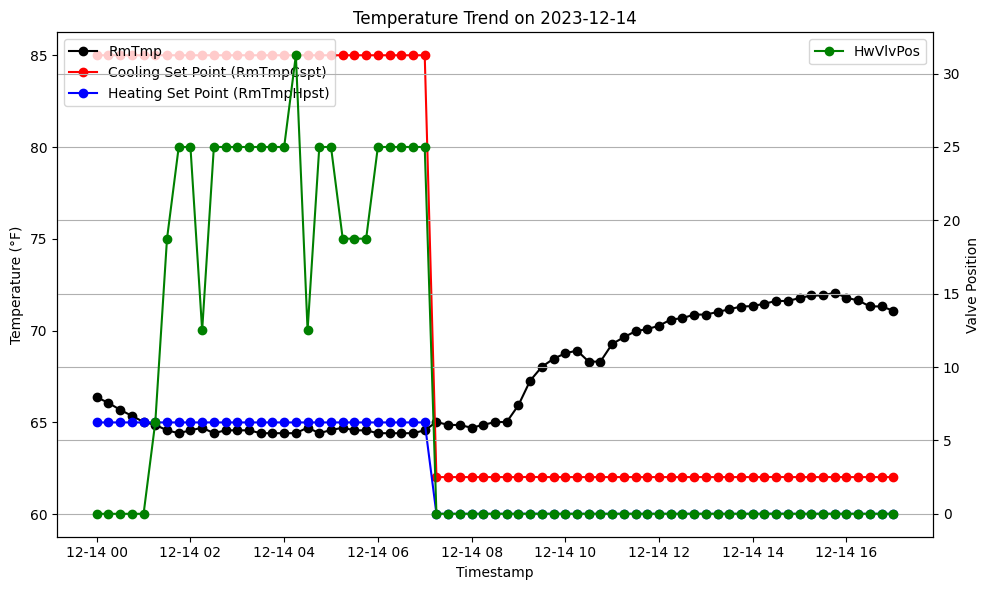

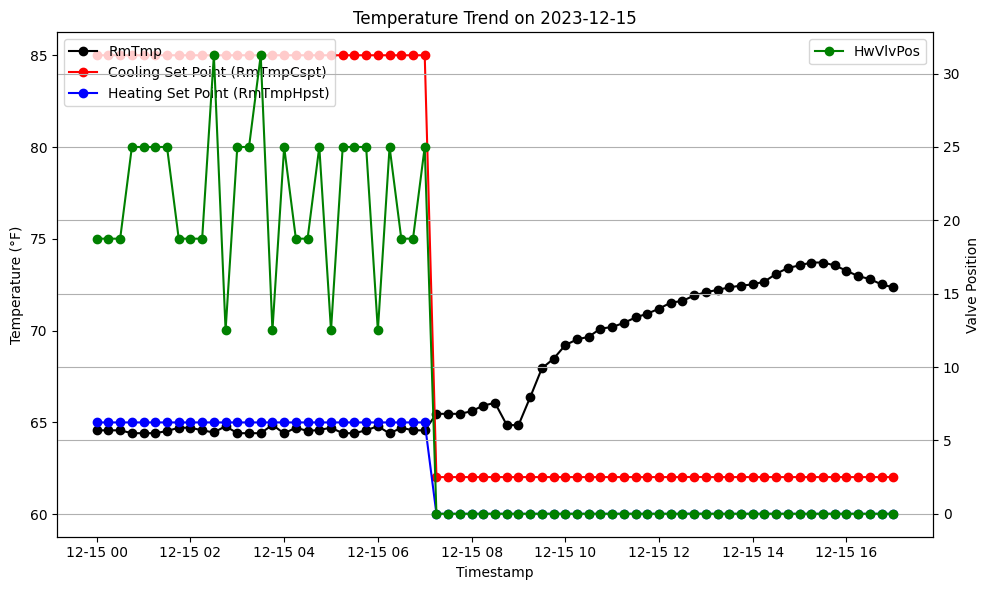

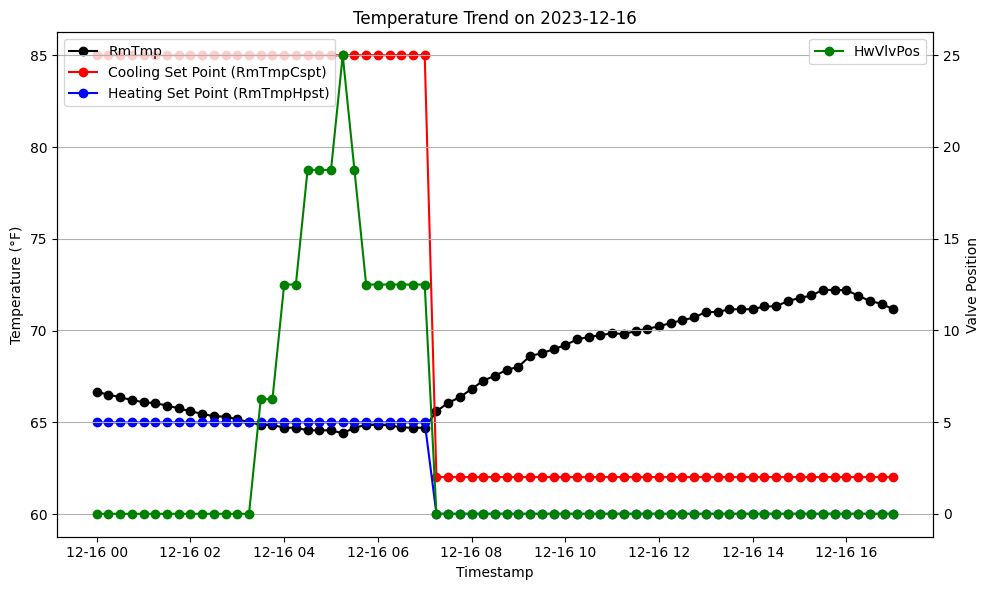

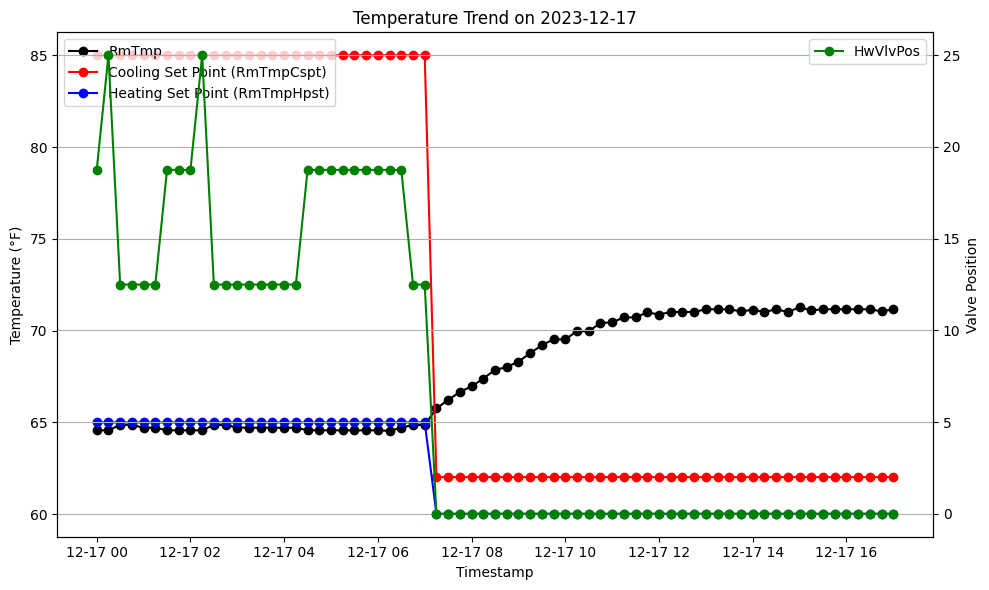

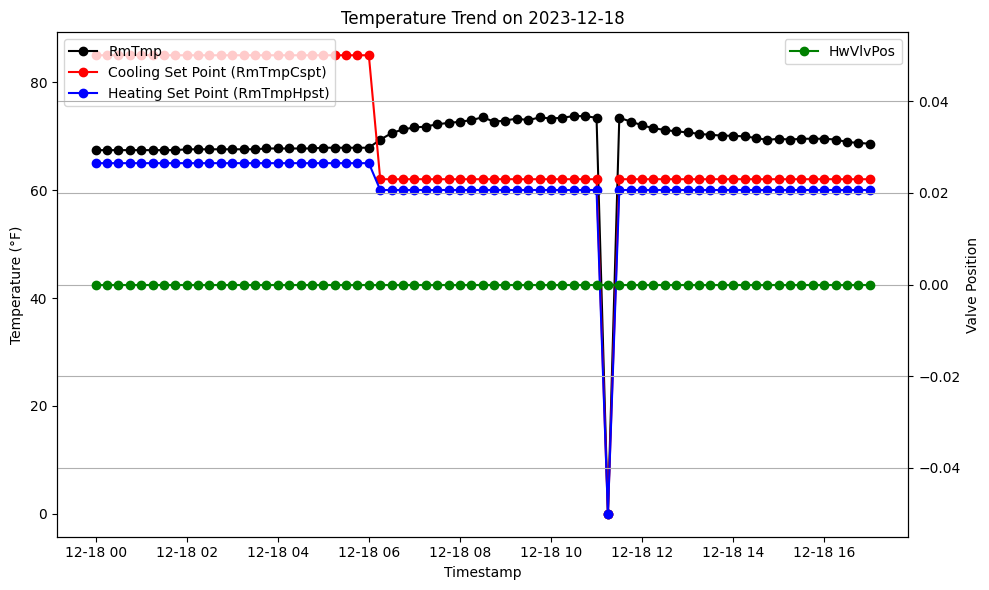

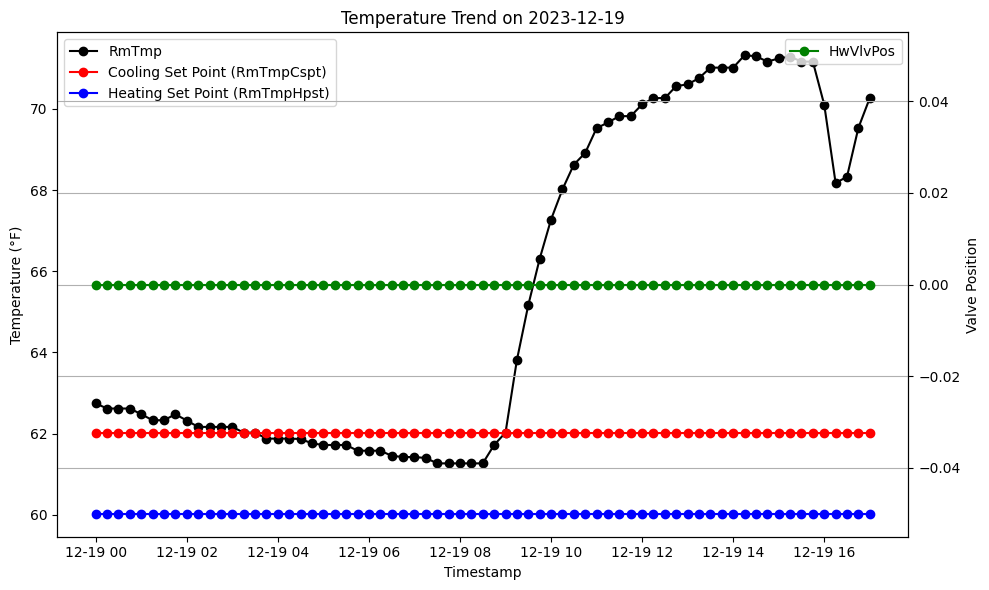

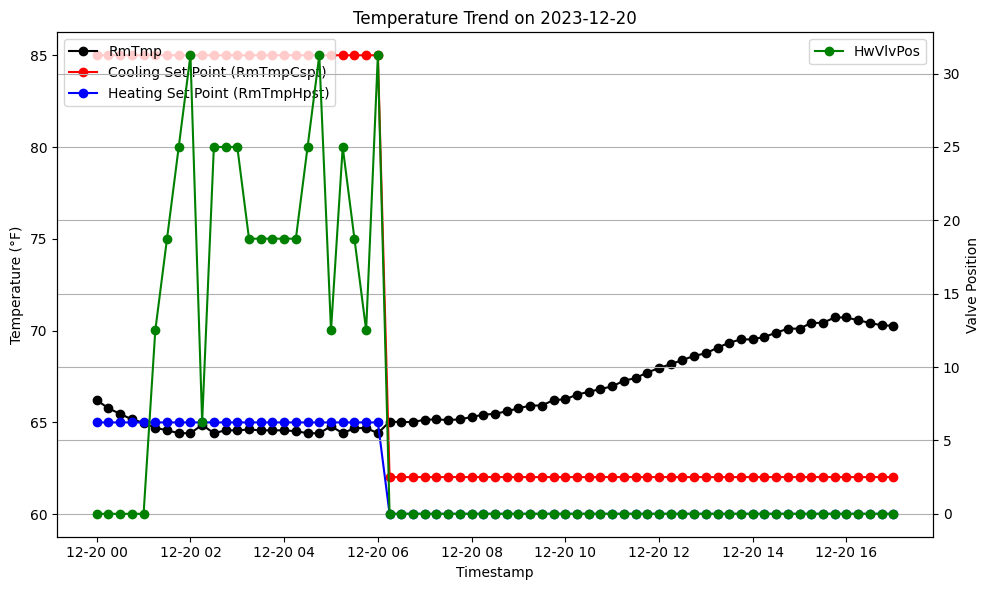

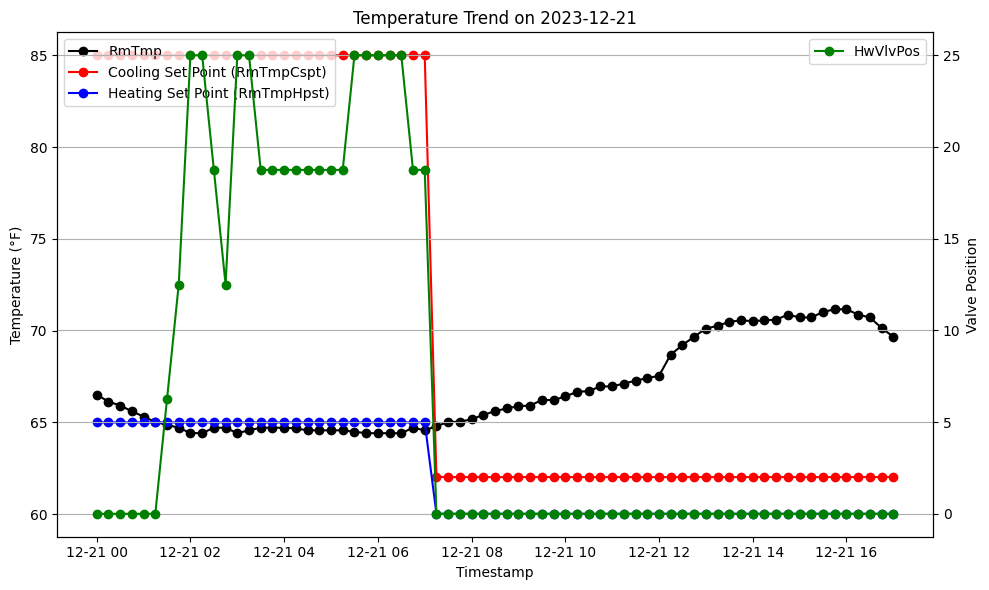

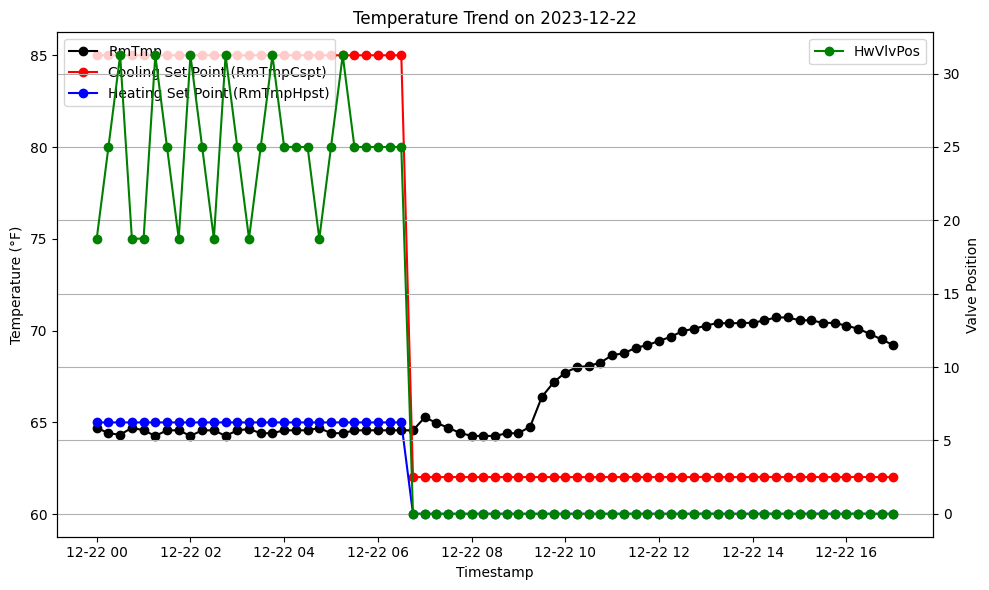

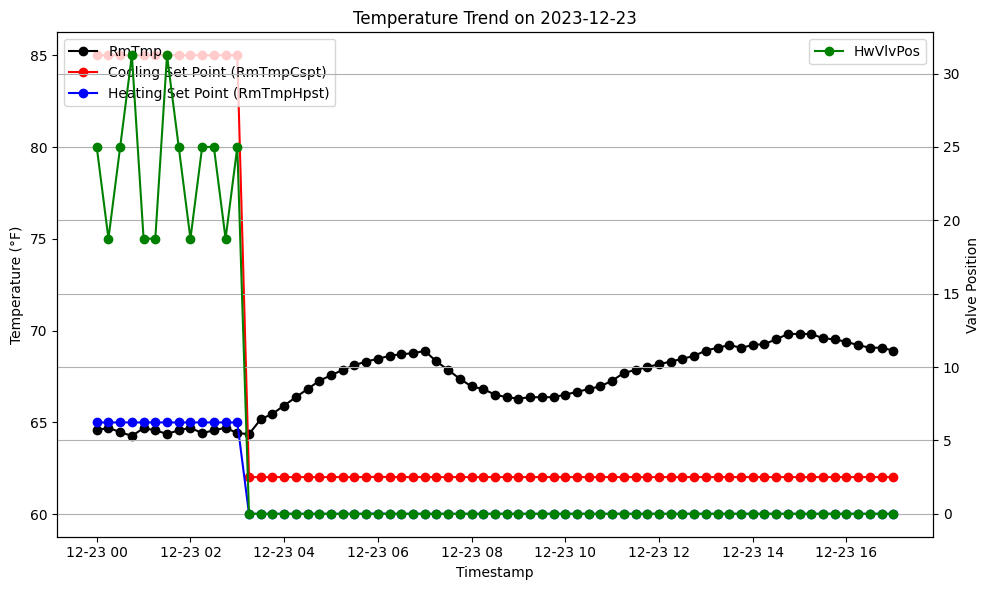

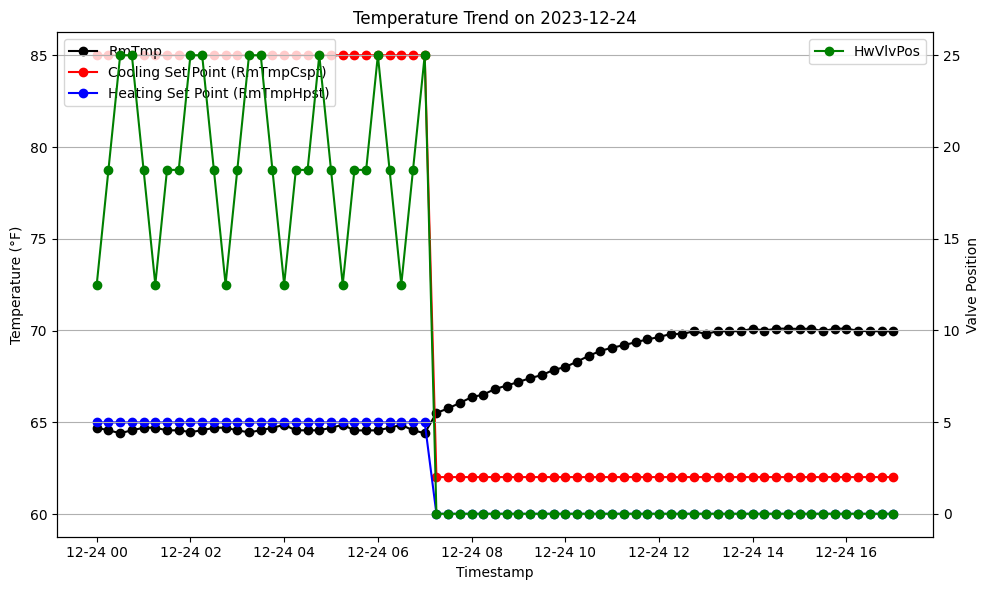

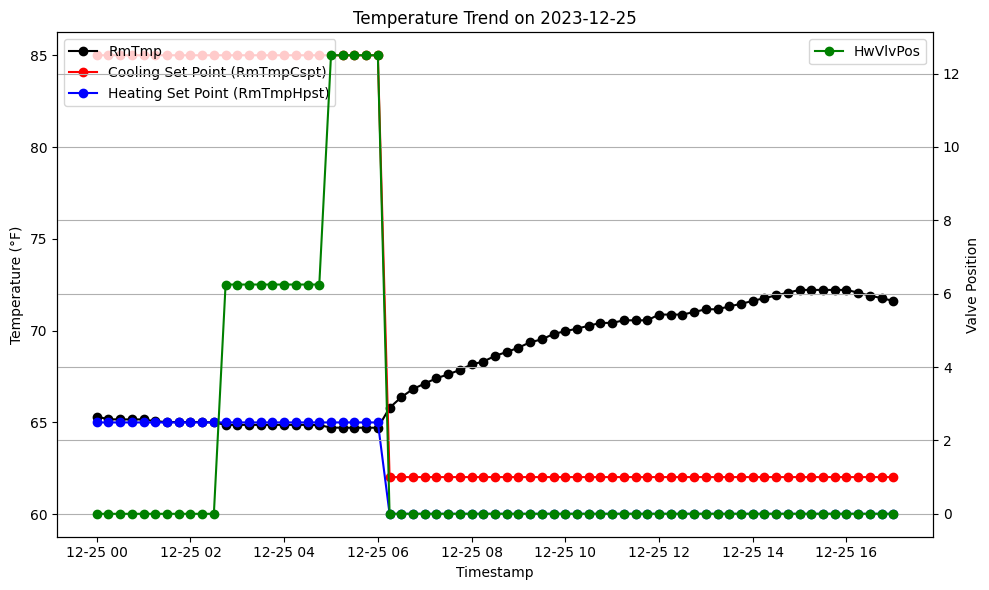

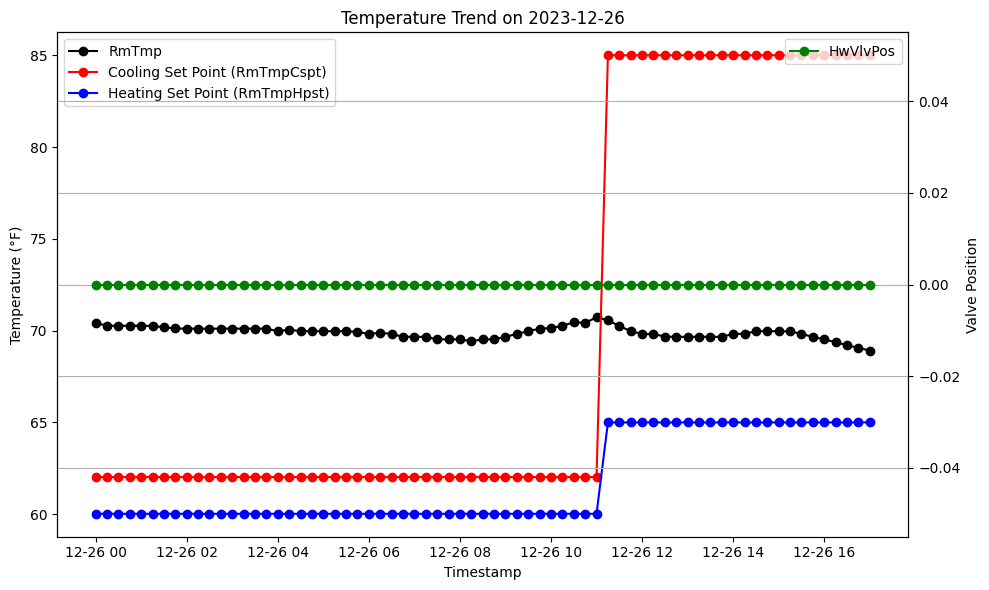

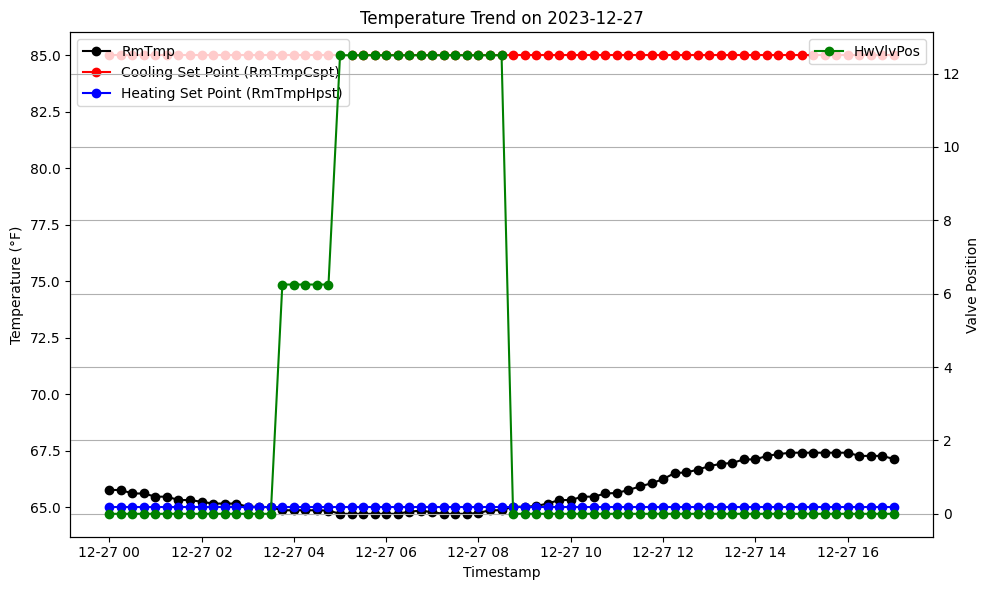

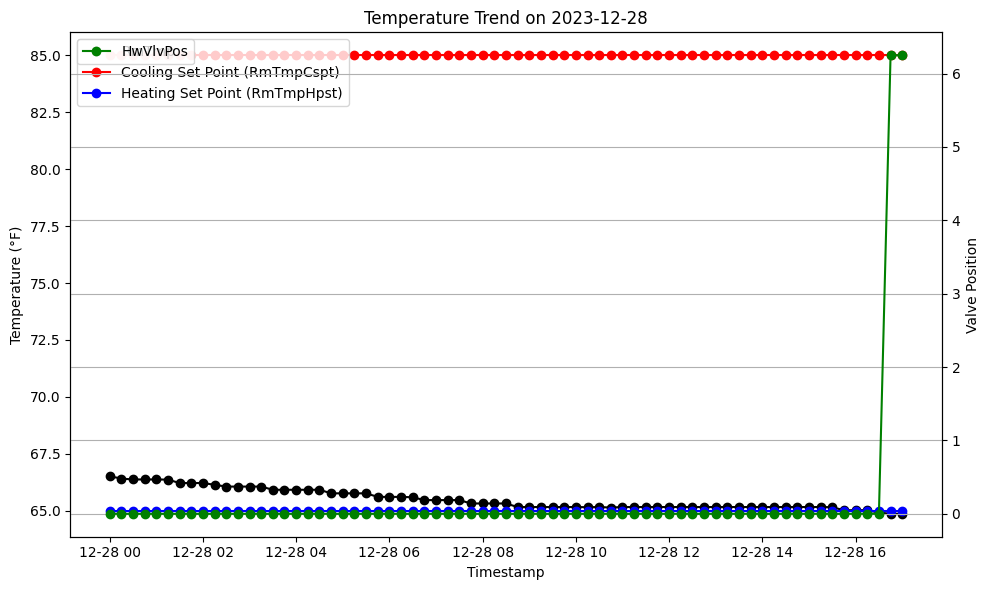

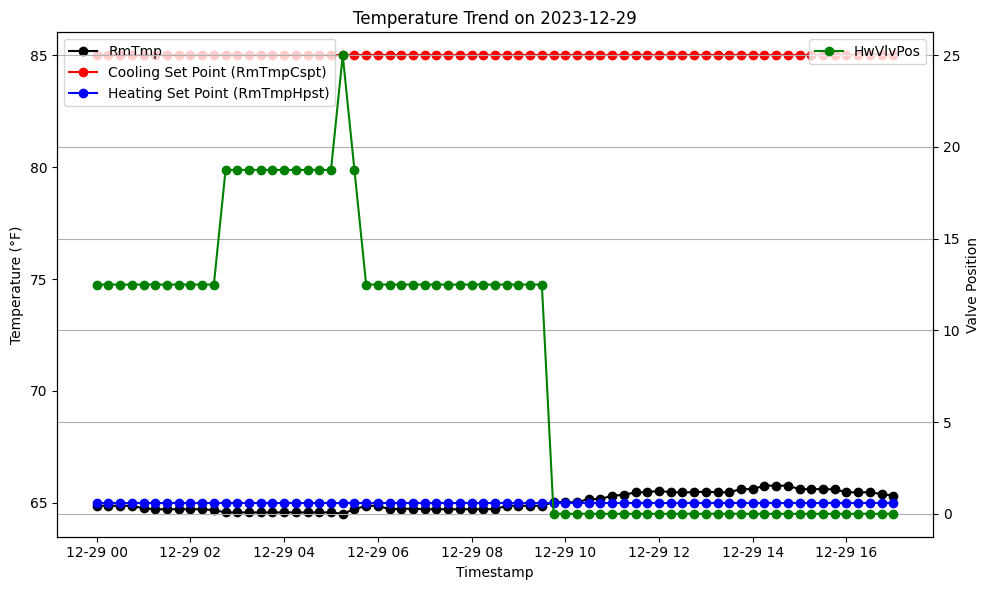

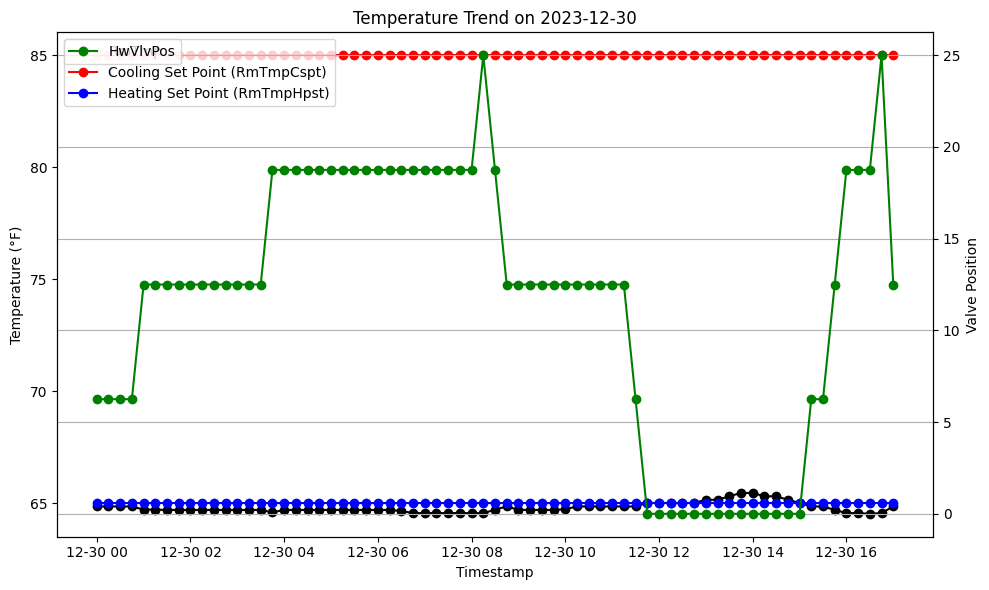

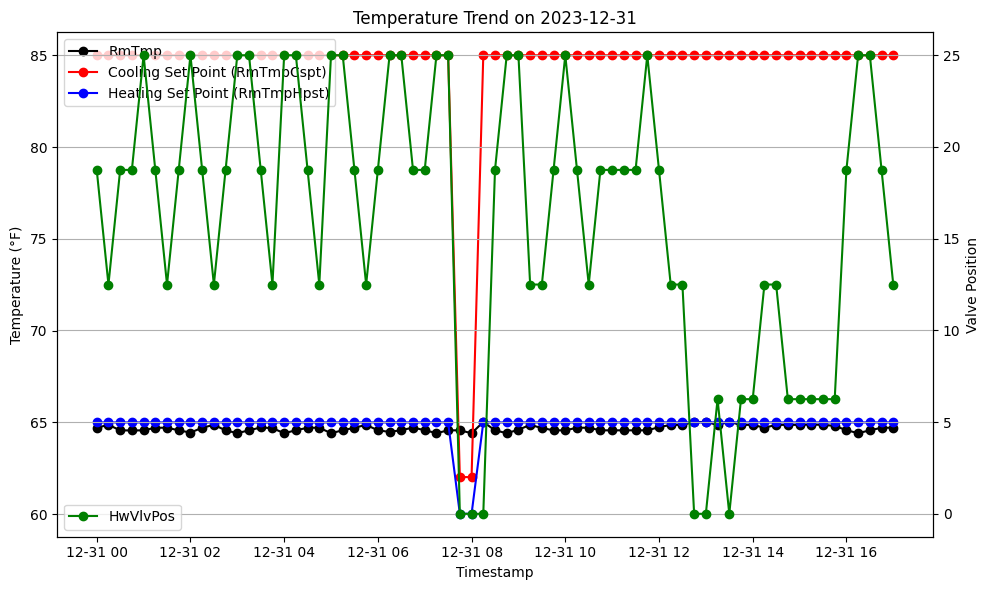

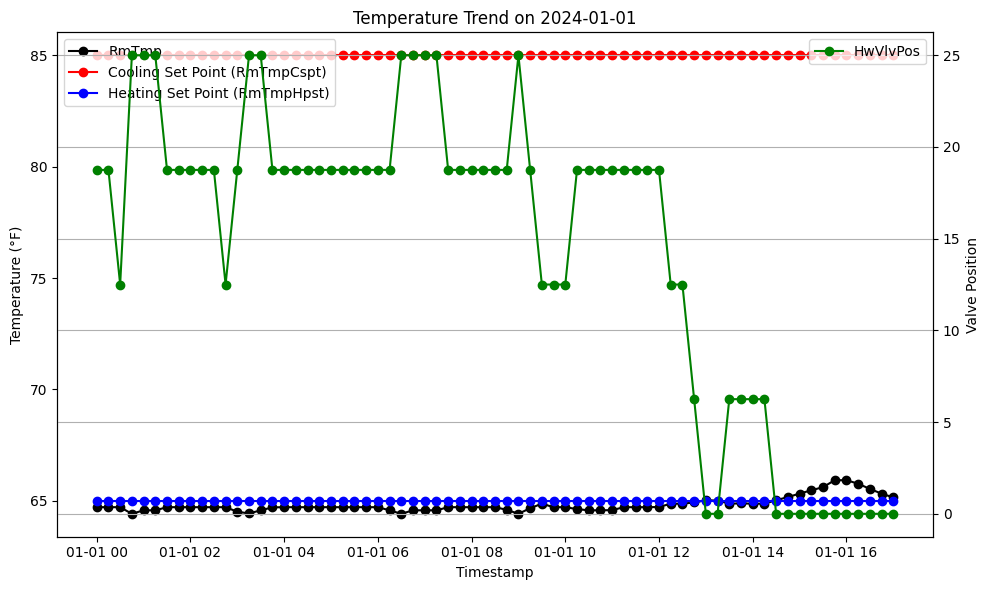

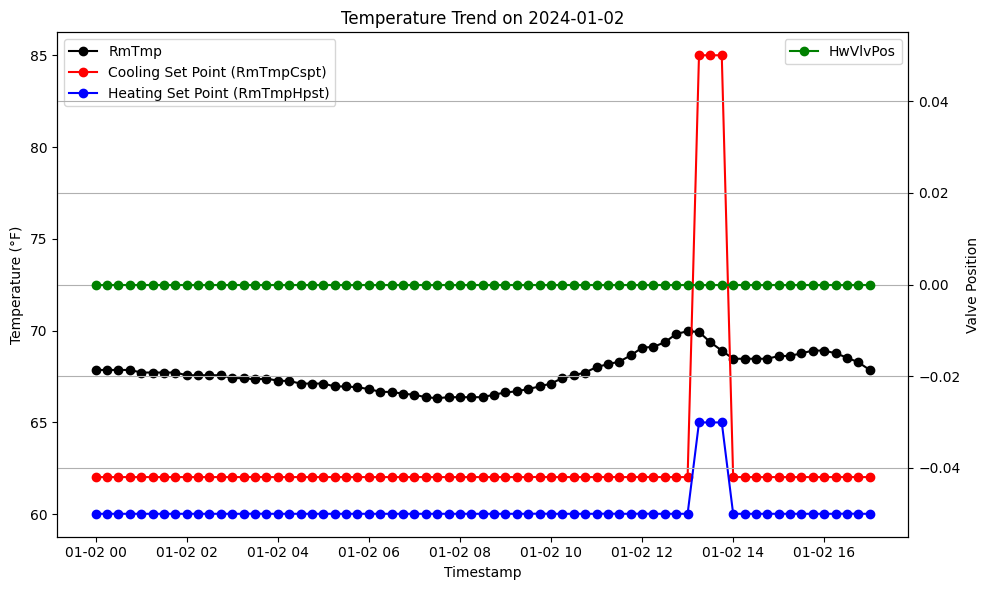

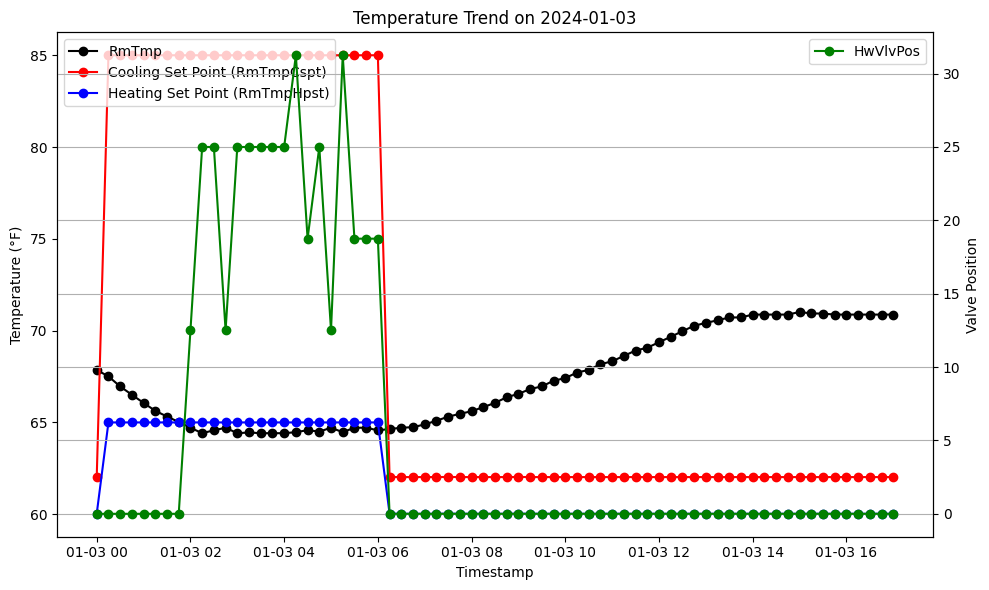

KeyboardInterrupt: 

In [9]:
for date in pd.date_range(start=start_date, end=end_date).date:
    daily_data  = df_filtered_by_date[(df_filtered_by_date['timestamp'].dt.date == date) & \
                                        (df_filtered_by_date['timestamp'].dt.time >= pd.to_datetime(start_time).time()) & \
                                        (df_filtered_by_date['timestamp'].dt.time <= pd.to_datetime(end_time).time())]
    
    if daily_data.empty:
        continue
     
    
    fig, ax1 = plt.subplots(figsize=(10, 6))  # Create figure and axes
    ax1.plot(daily_data['timestamp'], daily_data['RmTmp'], color='black', label='RmTmp',marker='o')
    ax1.plot(daily_data['timestamp'], daily_data['RmTmpCspt'], color='red', label='Cooling Set Point (RmTmpCspt)',marker='o')
    ax1.plot(daily_data['timestamp'], daily_data['RmTmpHpst'], color='blue', label='Heating Set Point (RmTmpHpst)',marker='o')

    # ax1.set_ylim(65, 85)
    ax1.set_xlabel("Timestamp")
    ax1.set_ylabel("Temperature (°F)")
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()  # Create a twin y-axis
    ax2.plot(daily_data['timestamp'], daily_data['HwVlvPos'], color='green', label='HwVlvPos',marker='o')
    ax2.set_ylabel("Valve Position")
    ax2.legend(loc='upper right')
    
    plt.title(f"Temperature Trend on {date}")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
for date in pd.date_range(start=start_date, end=end_date).date:
    daily_data  = df_filtered_by_date[(df_filtered_by_date['timestamp'].dt.date == date) & \
                                        (df_filtered_by_date['timestamp'].dt.time >= pd.to_datetime(start_time).time()) & \
                                        (df_filtered_by_date['timestamp'].dt.time <= pd.to_datetime(end_time).time())]
    
    if daily_data.empty:
        continue
    
    plt.figure(figsize=(10, 5))
    plt.plot(daily_data['timestamp'], daily_data['RmTmp'], color='black', label='RmTmp',marker='o', linestyle='-')
    plt.plot(daily_data['timestamp'], daily_data['RmTmpCspt'], color='red', label='Cooling Set Point (RmTmpCspt)',marker='o')
    plt.plot(daily_data['timestamp'], daily_data['RmTmpHpst'], color='blue', label='Heating Set Point (RmTmpHpst)',marker='o')
    plt.title(f"Temperature Trend on {date}")
    plt.xlabel('Timestamp')
    plt.ylabel('Temperature')
    plt.ylim(50, 90)
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()